## Home Credit Default Risk

In [100]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Union, Iterable

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
import xgboost as xgb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix  

%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.impute'

In [ ]:
application_test = pd.read_csv("../data/home_credit_default_risk/application_test.csv")
application_train = pd.read_csv("../data/home_credit_default_risk/application_train.csv")
POS_CASH_balance = pd.read_csv("../data/home_credit_default_risk/POS_CASH_balance.csv")
# HomeCredit_columns_description = pd.read_csv("../data/home_credit_default_risk/HomeCredit_columns_description.csv")
bureau = pd.read_csv("../data/home_credit_default_risk/bureau.csv")
bureau_balance = pd.read_csv("../data/home_credit_default_risk/bureau_balance.csv")
credit_card_balance = pd.read_csv("../data/home_credit_default_risk/credit_card_balance.csv")
installments_payments = pd.read_csv("../data/home_credit_default_risk/installments_payments.csv")
previous_application = pd.read_csv("../data/home_credit_default_risk/previous_application.csv")
sample_submission = pd.read_csv("../data/home_credit_default_risk/sample_submission.csv")

In [ ]:
# Applications
print(application_train.columns)
application_train.head()

In [ ]:
print(POS_CASH_balance.columns)
POS_CASH_balance.head()

In [ ]:
POS_CASH_balance[POS_CASH_balance['SK_ID_CURR']==100002]

In [ ]:
bureau.head()

In [ ]:
bureau_balance.head()

In [ ]:
credit_card_balance.head()

In [ ]:
installments_payments.head()

In [ ]:
previous_application.head()

In [ ]:
sample_submission.head()

In [ ]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

### Missing data

In [ ]:
# Application
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

In [ ]:
# POS
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

In [ ]:
# Bureau balance
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

In [ ]:
# Previous application
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

In [ ]:
# Installment payments
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

In [ ]:
# Card balance
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

In [ ]:
# Bureau
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.4, hspace = 0.5)

ax[0,0].set_title("Distribution of AMT_CREDIT")
g00 = sns.distplot(application_train["AMT_CREDIT"], ax=ax[0,0])
g00.set_xticklabels(ax[0,0].get_xticks(), rotation=60)

ax[0,2].set_title("Distribution of AMT_INCOME_TOTAL")
g02 = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna(), ax=ax[0,2])
g02.set_xticklabels(ax[0,2].get_xticks(), rotation=60)

ax[1,0].set_title("Distribution of AMT_GOODS_PRICE")
g10 = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna(), ax=ax[1,0])
g10.set_xticklabels(ax[1,0].get_xticks(), rotation=60)

temp = application_train["NAME_TYPE_SUITE"].value_counts()
ax[1,1].set_title('Name of type of the Suite')
g11 = sns.barplot(temp.index, temp.values, alpha=0.8, ax=ax[1,1])
g11.set_xticklabels(g11.get_xticklabels(), rotation=60)
ax[1,1].set(xlabel='Name of type of the Suite', ylabel='Count of Name of type of the Suite')

temp = application_train["NAME_TYPE_SUITE"].value_counts()
ax[1,2].set_title('Applicant Accompanied By')
g12 = sns.barplot(temp.index, temp.values, alpha=0.8, ax=ax[1,2])
g12.set_xticklabels(g12.get_xticklabels(), rotation=60)
ax[1,2].set(xlabel='Accompanier', ylabel='Count')

ax[0, 1].axis('off')

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,18), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.3, hspace = 0.6)

temp = application_train["TARGET"].value_counts()
temp_df = pd.DataFrame({'labels': ['Yes', 'No'], 'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[0,0].set_title('Loan Repayments')
g10 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[0,0])
g10.set_xticklabels(g10.get_xticklabels(), rotation=60)
ax[0,0].set(xlabel='Repaid', ylabel='Percent')

temp = application_train["NAME_CONTRACT_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': ['Cash', 'Revolving'], 'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[0,1].set_title('Type of Loan Plan')
g01 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[0,1])
g01.set_xticklabels(g01.get_xticklabels(), rotation=60)
ax[0,1].set(xlabel='Type', ylabel='Percent')

own_car = application_train["FLAG_OWN_CAR"].value_counts()
own_realty = application_train["FLAG_OWN_REALTY"].value_counts()
temp_df = pd.concat((pd.DataFrame({'asset':'car', 'labels': ['No', 'Yes'], 'values': own_car.values}),
                     pd.DataFrame({'asset':'realty', 'labels': ['Yes', 'No'], 'values': own_realty.values})))
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[0,2].set_title('Purpose of Loan')
g12 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', hue='asset', ax=ax[0,2])
g12.set_xticklabels(g12.get_xticklabels(), rotation=60)
ax[0,2].set(xlabel='', ylabel='Percent')

temp = application_train["NAME_INCOME_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[1,0].set_title('Income sources of Applicants')
g10 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[1,0])
g10.set_xticklabels(g10.get_xticklabels(), rotation=60)
ax[1,0].set(xlabel='Income Source', ylabel='Percent')

temp = application_train["NAME_FAMILY_STATUS"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[1,1].set_title('Applicant Family Status')
g11 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[1,1])
g11.set_xticklabels(g11.get_xticklabels(), rotation=60)
ax[1,1].set(xlabel='Status', ylabel='Percent')

temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[1,2].set_title('Applicant Education Status')
g12 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[1,2])
g12.set_xticklabels(g12.get_xticklabels(), rotation=60)
ax[1,2].set(xlabel='Education', ylabel='Percent')

temp = application_train["OCCUPATION_TYPE"].value_counts()
temp_df = pd.DataFrame({'Occupation': temp.index,'Count': temp.values})
temp_df['Count'] = 100*temp_df['Count']/temp_df.cumsum().Count[len(temp_df)-1]
ax[2,0].set_title('Applicant Occupation Type')
g20 = sns.barplot(x='Occupation', y='Count', data=temp_df, palette='Spectral', ax=ax[2,0])
g20.set_xticklabels(g20.get_xticklabels(), rotation=60)
ax[2,0].set(xlabel='Occupation', ylabel='Percent')

temp = application_train["NAME_HOUSING_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[2,2].set_title('Type of House')
g22 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[2,2])
g22.set_xticklabels(g22.get_xticklabels(), rotation=60)
ax[2,2].set(xlabel='Type of Residence', ylabel='Percent')

ax[2, 1].axis('off')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.2)

temp = application_train["ORGANIZATION_TYPE"].value_counts()
temp_df = pd.DataFrame({'Organization': temp.index,'Count': temp.values})
temp_df['Count'] = 100*temp_df['Count']/temp_df.cumsum().Count[len(temp_df)-1]
ax.set_title('Types of Organizations who applied for loan')
g1 = sns.barplot(x='Organization', y='Count', data=temp_df, palette='Spectral', ax=ax)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax.set(xlabel='Organization Name', ylabel='Percent')


In [ ]:
def plot_subplot_by_repayment(ax, nrows: int, ncols: int,
                              prop: str, title: str, x_label: 
                              str, ind: Union[int, Tuple[int]],
                              x_rot: int=30):
    
    assert ind < nrows*ncols    
    use_multi_ind = nrows!=1 and ncols!=1
    use_no_index = nrows*ncols==1
    pos_y = ind % ncols
    pos_x = ind // ncols
    
    if use_multi_ind:
        ha = ax[pos_x, pos_y]
    elif use_no_index:
        ha = ax
    else:
        ha = ax[ind]

    temp = application_train[prop].value_counts()
    temp_y0 = []
    temp_y1 = []
    for val in temp.index:
        temp_y1.append(np.sum(application_train["TARGET"][application_train[prop]==val] == 1))
        temp_y0.append(np.sum(application_train["TARGET"][application_train[prop]==val] == 0))    
    temp_df = pd.concat((pd.DataFrame({'x': temp.keys(), 'y':temp_y1, 'repaid': 'No'}),
                         pd.DataFrame({'x': temp.keys(), 'y':temp_y0, 'repaid': 'Yes'})
                        ))
    temp_df.y = 100*temp_df.y / temp_df.cumsum().y.values[-1]
    ha.set_title(title)
    g0 = sns.barplot(x='x', y='y', data=temp_df, palette='Spectral', hue='repaid', ax=ha)
    g0.set_xticklabels(g0.get_xticklabels(), rotation=x_rot)    
    ha.set(xlabel=x_label, ylabel='Percent')
    

def plot_previous_application(ax,
                              nrows: int, ncols: int,
                              prop: str, title: str, x_label: str, 
                              ind: Union[int, Tuple[int]],
                              x_rot: int=30,
                              df: pd.DataFrame=previous_application):
    
    assert ind < nrows*ncols    
    use_multi_ind = nrows!=1 and ncols!=1
    use_no_index = nrows*ncols==1
        
    if use_multi_ind:
        pos_y = ind % ncols
        pos_x = ind // ncols
        ha = ax[pos_x, pos_y]
    elif use_no_index:
        ha = ax
    else:
        ha = ax[ind]

    temp = df[prop].value_counts()
    temp_df = pd.DataFrame({'x': temp.index,'y': temp.values})
    temp_df.y = 100*temp_df.y / temp_df.cumsum().y.values[-1]
    ha.set_title(title)
    g1 = sns.barplot(x='x', y='y', data=temp_df, palette='Spectral', ax=ha)
    g1.set_xticklabels(g1.get_xticklabels(), rotation=x_rot)
    ha.set(xlabel=x_label, ylabel='Percent')


In [ ]:
nrows=4
ncols=2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,25), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.1, hspace = 0.8)
ax[3, 1].axis('off')

properties = ('NAME_INCOME_TYPE',
              'NAME_FAMILY_STATUS',
              'OCCUPATION_TYPE',
              'NAME_EDUCATION_TYPE',
              'NAME_HOUSING_TYPE',
              'ORGANIZATION_TYPE',
              'NAME_TYPE_SUITE'
             )
titles = ('Applicant Income Source Split by Repayment',
          'Applicant Family Status Split by Repayment',
          'Applicant Occupation Split by Repayment',
          'Applicant Education Status Split by Repayment',
          'Housing Type of Application Split by Repayment',
          'Types of Organizations who Applied for Loans Split by Repayment',
          'Accompanying Applicant'
         )
labels = ('Source'
          ,'Status',
          'Occupation',
          'Education',
          'Type',
          'Organization',
          'Type'
         )
indices = range(7)

for t, l, i, p in zip(titles, labels, indices, properties):
    plot_subplot_by_repayment(ax, 
                              nrows=nrows, ncols=ncols,
                              prop=p,
                              title=t,
                              x_label=l,
                              ind=i,
                              x_rot=75
                             )


In [ ]:
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange,
    Row
)
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.palettes import Spectral, Category20c, Viridis3, BuGn
from bokeh.transform import cumsum
import holoviews as hv #There is a reason we have to do this here but its not important. Holoviews is the next library
hv.extension('bokeh')

def plot_pie_charts(df: pd.DataFrame,
                    nrows: int, ncols: int,
                    titles: List[str],
                    props: List[str],
                    x_labels: List[str]):
        
    plots = [None]*nrows*ncols
    
    for t, p, l, ind in zip(titles, props, x_labels, range(len(titles))):
        
        temp = df[p].value_counts()
        temp_df = pd.DataFrame({l: temp.index,
                               'Count': temp.values})
        temp_df['Pct'] = 100*temp_df['Count']/temp_df.cumsum().Count[len(temp_df)-1]
        temp_df['angle'] = temp_df['Count']/sum(temp_df['Count']) * 2*np.pi
        if len(temp_df)==2:
            temp_df['color'] = Category20c[3][:2]
        else:
            temp_df['color'] = Category20c[len(temp_df)]
        
        p = figure(height=300, width=600, title=t, toolbar_location=None,
                   tools="hover", tooltips="@{}: @Pct".format(l))

        p.wedge(x=0, y=1, radius=0.4, fill_alpha=0.5,
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle', include_zero=False),
                line_color="white", fill_color='color', legend=l, source=temp_df)
        
        p.axis.axis_label=None
        p.axis.visible=False
        p.grid.grid_line_color = None
        p.legend.location = "bottom_left"
        p.legend.orientation = "horizontal"
        plots[ind] = p

    grid = gridplot([plots[i] for i in range(ncols*nrows)], ncols=2, plot_width=500, plot_height=350)
    show(grid)


In [ ]:
plot_pie_charts(df=previous_application,
                nrows=3, ncols=3,
                titles=['Contract Product Type for Previous Application', 
                        'Contract Approvals','Previous Payment Methods', 
                        'Existing Client During Previous Application', 
                        'Previous Application Asset',
                        'Previous Application X-Sell or Walk-in',
                        'Detailed Product Combinations of Previous Applications',
                        'Insurance Previously Requested'
                       ],
                props=['NAME_CONTRACT_TYPE', 
                       'NAME_CONTRACT_STATUS',
                       'NAME_PAYMENT_TYPE', 
                       'NAME_CLIENT_TYPE', 
                       'NAME_PORTFOLIO',
                       'NAME_PRODUCT_TYPE',
                       'PRODUCT_COMBINATION',
                       'NFLAG_INSURED_ON_APPROVAL'
                      ],
                x_labels=['Contract', 
                          'Status',
                          'Method',
                          'Client', 
                          'Asset',
                          'Product',
                          'Combinations',
                          'Requested'
                         ]
               )


In [ ]:

nrows=3
ncols=3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.1, hspace = .8)

properties = ('NAME_CONTRACT_TYPE',
              'WEEKDAY_APPR_PROCESS_START',
              'NAME_CASH_LOAN_PURPOSE',
              'CODE_REJECT_REASON',
              'NAME_TYPE_SUITE',
              'NAME_GOODS_CATEGORY',
              'CHANNEL_TYPE',
              'NAME_SELLER_INDUSTRY',
              'NAME_YIELD_GROUP'
             )
titles = ('Contract Product Type for Previous Application', 
          'Days on which clients applied previously',
          'Purpose of cash loan in previous application',
          'Previous Application Rejections',
          'Accompanied Client For Previous Application',
          'Goods Previously Applied For',
          'Channels Through Which Client Previously Acquired',
          'Top Industries of Sellers',
          'Grouped Interest Rates of Previous Applications'
          
         )
labels = ('Contract Type',
          'Day of Week',
          'Purpose',
          'Reason',
          'Accompanied',
          'Goods',
          'Channel',
          'Seller',
          'Intereset Rates'
         )
indices = range(nrows*ncols)

for t, l, i, p in zip(titles, labels, indices, properties):
    plot_previous_application(ax ,nrows=nrows, ncols=ncols,
                              prop=p,
                              title=t,
                              x_label=l,
                              ind=i,
                              x_rot=75
                             )


In [ ]:
df_LT = application_train.corr().where(np.tril(np.ones(application_train.corr().shape), k=-1).astype(np.bool))
plt.figure(figsize=(15,15))
sns.heatmap(df_LT, vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

### Feature importance with random forests

In [ ]:
categorical_feats = [f for f in application_train.columns if application_train[f].dtype == 'object']

for col in categorical_feats:
    lb = LabelEncoder()
    lb.fit(list(application_train[col].values.astype('str')) + list(application_test[col].values.astype('str')))
    application_train[col] = lb.transform(list(application_train[col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))

In [ ]:
application_train.fillna(-999, inplace = True)

In [ ]:
application_train.head()

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1), application_train.TARGET)
features = application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
f = plt.figure(figsize=(8,25))
ax = sns.barplot(
    y=y,
    x=x);
ax.set(xlabel='Importance', ylabel='Features')


In [ ]:
# Gradient boosting to find feature importance
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1),
                                                                    application_train.TARGET, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

seed = 7
xgb_model = xgb.XGBClassifier(silent=True, 
                          scale_pos_weight=1,
                          learning_rate=0.1,  
                          colsample_bytree =0.3,
                          subsample = .8,
                          objective='binary:logistic', 
                          n_estimators=1000, 
                          reg_lambda=1,
                          max_depth=2, 
                          gamma=2,
                          
                         )
xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

In [ ]:
rs = xgb_model.evals_result()
rs_train_df = pd.DataFrame(rs['validation_0'])
rs_test_df = pd.DataFrame(rs['validation_1'])

rs_test_df['Iteration'] = np.arange(0, len(rs_test_df))
rs_train_df['Iteration'] = np.arange(0, len(rs_train_df))

rs_test_df['Dataset'] = 'Test'
rs_train_df['Dataset'] = 'Train'

rs_df = pd.concat((rs_test_df, rs_train_df))

g = sns.lineplot(x='Iteration', y='error', hue='Dataset', data=rs_df)

# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

In [ ]:
xgb_rs = pd.DataFrame({'values': xgb_model.feature_importances_, 'features': X_train.columns}).sort_values(by='values')
f = plt.figure(figsize=(8,25))
ax = sns.barplot(
    y='features',
    x='values',
    data=xgb_rs
    );
ax.set(xlabel='Importance', ylabel='Features')

#### How well do these important features differentiate between accepted and rejected loan applications?

In [ ]:
previous_loan_counts = application_train.join(bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'}), on='SK_ID_CURR', rsuffix='_r')
previous_loan_counts = previous_loan_counts.drop(['SK_ID_CURR_r'], axis=1)
previous_loan_counts['previous_loan_counts'] = previous_loan_counts['previous_loan_counts'].fillna(0)

previous_loan_counts.head()

In [ ]:
def plot_kde_differentiable(props: Iterable[str],
                            titles: Iterable[str],
                            labels: Iterable[str],
                            indices: Iterable[int],
                            x_rot: int=75,
                            figsize: Tuple[int, int]=(7,10),
                            df: pd.DataFrame=previous_loan_counts,
                            nrows: int=1, ncols: int=1,
                            ):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=False, sharey=False)
    plt.subplots_adjust(wspace = 0.3, hspace = .8)
    
    for ind in range(len(indices) - 1, nrows*ncols):
        if ind >= len(props):
            assert ind < nrows*ncols    
            use_multi_ind = nrows!=1 and ncols!=1
            use_no_index = nrows*ncols==1
            pos_y = ind % ncols
            pos_x = ind // ncols

            if use_multi_ind:
                ha = ax[pos_x, pos_y]
            elif use_no_index:
                ha = ax
            else:
                ha = ax[ind]
            ha.axis('off')
        
    for t, l, ind, p in zip(titles, labels, indices, props):
        
        assert ind < nrows*ncols    
        use_multi_ind = nrows!=1 and ncols!=1
        use_no_index = nrows*ncols==1
        pos_y = ind % ncols
        pos_x = ind // ncols

        if use_multi_ind:
            ha = ax[pos_x, pos_y]
        elif use_no_index:
            ha = ax
        else:
            ha = ax[ind]
        
        g0 = sns.kdeplot(df.loc[(df['TARGET'] == 0) & (df[p] > -999), p], label = 'Repaid', ax=ha, shade=True, color=Viridis3[0])
        g1 = sns.kdeplot(df.loc[(df['TARGET'] == 1) & (df[p] > -999), p], label = 'Defaulted', ax=ha, shade=True, color=Viridis3[1])
        
        ha.set_title(t)
        ha.set(xlabel=l, ylabel='Density')


In [ ]:
nrows = 4
ncols = 2
props = ('previous_loan_counts',
         'AMT_CREDIT',
         'EXT_SOURCE_2',
         'EXT_SOURCE_3',
         'EXT_SOURCE_1',
         'AMT_GOODS_PRICE',
         'AMT_ANNUITY'
        )
titles = ('Number of Previous Loans',
          'AMT_CREDIT', 
          'EXT_SOURCE_2', 
          'EXT_SOURCE_3', 
          'EXT_SOURCE_1',
          'AMT_GOODS_PRICE',
          'AMT_ANNUITY'
         )
labels = ('',
          '',
          '',
          '',
          '',
          '',
          ''
         )
indices = range(nrows*ncols)

plot_kde_differentiable(props=props, 
                        titles=titles, 
                        labels=labels, 
                        indices=indices, 
                        nrows=nrows, 
                        ncols=ncols, 
                        df=previous_loan_counts,
                        figsize=(13,10)
                       )

#### Computing statistics about the bureau data

In [ ]:
bureau_stats = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_stats.head()

In [ ]:
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_stats.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_stats.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [ ]:
bureau_stats.columns = columns
bureau_stats.head()

In [ ]:
previous_loan_counts = previous_loan_counts.merge(bureau_stats, on='SK_ID_CURR', how='left')
previous_loan_counts.head()

In [ ]:
new_corrs = previous_loan_counts.corr().where(np.tril(np.ones(previous_loan_counts.corr().shape), k=-1).astype(np.bool))
plt.figure(figsize=(15,15))
sns.heatmap(new_corrs, vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

In [ ]:
new_corrs_sorted = sorted([(new_corrs.TARGET.fillna(0).index[i], new_corrs.TARGET.fillna(0).values[i]) for i in range(len(new_corrs.fillna(0)))], key=lambda x: abs(x[1]), reverse=True)

In [ ]:
new_corrs_sorted[:10]

In [ ]:
nrows = 3
ncols = 1
props = ('bureau_DAYS_CREDIT_mean',
         'bureau_DAYS_CREDIT_UPDATE_mean',
         'REGION_RATING_CLIENT_W_CITY',
        )
titles = props
labels = ('',
          '',
          '',
         )
indices = range(nrows*ncols)

plot_kde_differentiable(props=props, 
                        titles=titles, 
                        labels=labels, 
                        indices=indices, 
                        nrows=nrows, 
                        ncols=ncols, 
                        df=previous_loan_counts,
                        figsize=(13,10)
                       )

#### Numerical aggregation

In [ ]:
def aggregate_numerically(df: pd.DataFrame,
                          group_by_variable: str,
                          name: str
                         ) -> pd.DataFrame:
    
    for col in df:
        if col != group_by_variable and 'SK_ID' in col:
            df = df.drop(columns=col)
    
    group_IDs = df[group_by_variable]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_by_variable] = group_IDs
    
    aggregate_df = numeric_df.groupby(group_by_variable).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
    
    columns = [group_by_variable]
    for var in aggregate_df.columns.levels[0]:
        if var != group_by_variable:
            for stat in aggregate_df.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (name, var, stat))

    aggregate_df.columns = columns
    return aggregate_df

In [ ]:
bureau_agg_new = aggregate_numerically(bureau.drop(columns = ['SK_ID_BUREAU']), group_by_variable='SK_ID_CURR', name='bureau')
bureau_agg_new.head()

In [ ]:
previous_loan_counts = previous_loan_counts.merge(bureau_stats, on = 'SK_ID_CURR', how = 'left')
previous_loan_counts.head()

### Tackling categorical data

In [ ]:
bureau.dtypes

In [ ]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

In [ ]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

In [ ]:
# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != 'SK_ID_CURR':
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

In [ ]:
previous_loan_counts = previous_loan_counts.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
previous_loan_counts.head()

#### Adding more categorical data

In [ ]:
# Can use a function here to streamline the process

def categorize_and_count(df: pd.DataFrame, 
                         name: str,
                         group_by_variable: str='SK_ID_CURR'
                        ) -> pd.DataFrame:
    categorical_df = pd.get_dummies(df.select_dtypes('object'))
    categorical_df[group_by_variable] = df[group_by_variable]
    categorical_df = categorical_df.groupby(group_by_variable).agg(['sum', 'mean'])
    
    columns = []
    for var in categorical_df.columns.levels[0]:
            for stat in ['count', 'count_norm']:
                columns.append('%s_%s_%s' % (name, var, stat))
    categorical_df.columns = columns
    return categorical_df


In [ ]:
bureau_counts = categorize_and_count(df=bureau, group_by_variable='SK_ID_CURR', name='bureau')
bureau_counts.head()

In [ ]:
bureau_balance_counts = categorize_and_count(df=bureau_balance, group_by_variable='SK_ID_BUREAU', name='bureau_balance')
bureau_balance_counts.head()

In [ ]:
bureau_balance_agg = aggregate_numerically(df=bureau_balance, group_by_variable='SK_ID_BUREAU', name='bureau_balance')
bureau_balance_agg.head()

In [ ]:
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index=True, left_on='SK_ID_BUREAU', how='outer')
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on='SK_ID_BUREAU', how='left')
bureau_by_loan.head()

In [ ]:
bureau_balance_by_client = aggregate_numerically(df=bureau_by_loan.drop(columns=['SK_ID_BUREAU']), group_by_variable='SK_ID_CURR', name='client')
bureau_balance_by_client.head()

In [ ]:
previous_loan_counts = previous_loan_counts.merge(bureau_balance_by_client, on='SK_ID_CURR', how='left')
previous_loan_counts.head()

In [ ]:
original_features = list(application_train.columns)
print('Original Number of Features: ', len(original_features))

new_features = list(previous_loan_counts.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

In [ ]:
def find_missing_values_by_column(df: pd.DataFrame) -> pd.DataFrame:
    
    missing_values = df.isnull().sum()
    percent_missing = 100.0*df.isnull().sum()/len(df)
    missing_value_table = pd.concat([missing_values, percent_missing], axis=1)
    
    missing_value_renamed_columns = missing_value_table.rename(
        columns = {0: 'Missing Values', 1: '% Missing of Total'}
    )
    
    missing_value_renamed_columns = missing_value_renamed_columns[
        missing_value_renamed_columns.iloc[:,1] != 0
    ].sort_values('% Missing of Total', ascending=False).round()
    
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
           + str(missing_value_renamed_columns.shape[0]) +
              " columns have missing values.")
    
    return missing_value_renamed_columns

In [ ]:
find_missing_values_by_column(application_train)
training_missing = find_missing_values_by_column(previous_loan_counts)
training_missing.head(15)

In [ ]:
list(training_missing.index[training_missing['% Missing of Total'] > 90])

In [ ]:
credit_card_balance.head()

In [ ]:
credit_card_balance_counts = categorize_and_count(df=credit_card_balance,
                                                  group_by_variable='SK_ID_CURR',
                                                  name='credit_card_balance'
                                                 )
credit_card_balance_counts.head()

In [ ]:
credit_card_balance_agg = aggregate_numerically(df=credit_card_balance.drop(columns = ['SK_ID_PREV']),
                                                group_by_variable='SK_ID_CURR',
                                                name='credit_card_balance'
                                               )
credit_card_balance_agg.head()                                                

In [ ]:
# Merge with the value counts of credit card balance
previous_loan_counts = previous_loan_counts.merge(credit_card_balance_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
previous_loan_counts = previous_loan_counts.merge(credit_card_balance_agg, on = 'SK_ID_CURR', how = 'left')


In [ ]:
new_features = list(previous_loan_counts.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

In [ ]:
POS_CASH_balance.head()

In [ ]:
POS_CASH_balance_counts = categorize_and_count(df=POS_CASH_balance,
                                                  group_by_variable='SK_ID_CURR',
                                                  name='POS_cash_balance'
                                                 )
POS_CASH_balance_agg = aggregate_numerically(df=POS_CASH_balance.drop(columns = ['SK_ID_PREV']),
                                                group_by_variable='SK_ID_CURR',
                                                name='POS_cash_balance'
                                               )
# Merge with the value counts of bureau
previous_loan_counts = previous_loan_counts.merge(POS_CASH_balance_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
previous_loan_counts = previous_loan_counts.merge(POS_CASH_balance_agg, on = 'SK_ID_CURR', how = 'left')

new_features = list(previous_loan_counts.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

In [ ]:
installments_payments.head()

In [ ]:
installments_payments_agg = aggregate_numerically(df=installments_payments.drop(columns = ['SK_ID_PREV']),
                                                group_by_variable='SK_ID_CURR',
                                                name='installments_payments'
                                               )
# Merge with the stats of bureau
previous_loan_counts = previous_loan_counts.merge(installments_payments_agg, on = 'SK_ID_CURR', how = 'left')

new_features = list(previous_loan_counts.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

In [ ]:
previous_application.head()

In [ ]:
previous_application_counts = categorize_and_count(df=previous_application,
                                                  group_by_variable='SK_ID_CURR',
                                                  name='previous_application'
                                                 )
previous_application_agg = aggregate_numerically(df=previous_application.drop(columns = ['SK_ID_PREV']),
                                                group_by_variable='SK_ID_CURR',
                                                name='previous_application'
                                               )
# Merge with the value counts of bureau
previous_loan_counts = previous_loan_counts.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
previous_loan_counts = previous_loan_counts.merge(previous_application_agg, on = 'SK_ID_CURR', how = 'left')

new_features = list(previous_loan_counts.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

In [ ]:
application_train = pd.read_csv("../data/home_credit_default_risk/application_train.csv")
train = application_train.join(bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'}), on='SK_ID_CURR', rsuffix='_r')
train = train.drop(['SK_ID_CURR_r'], axis=1)
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train = train.merge(categorical_grouped, on = 'SK_ID_CURR', how = 'left')
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
train = train.merge(bureau_stats, on = 'SK_ID_CURR', how = 'left')
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
train = train.merge(credit_card_balance_counts, on = 'SK_ID_CURR', how = 'left')
train = train.merge(credit_card_balance_agg, on = 'SK_ID_CURR', how = 'left')
train = train.merge(POS_CASH_balance_counts, on = 'SK_ID_CURR', how = 'left')
train = train.merge(POS_CASH_balance_agg, on = 'SK_ID_CURR', how = 'left')
train = train.merge(installments_payments_agg, on = 'SK_ID_CURR', how = 'left')
train = train.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')
train = train.merge(previous_application_agg, on = 'SK_ID_CURR', how = 'left')

In [ ]:
training_missing = find_missing_values_by_column(train)
training_missing.head(25)

In [ ]:
training_missing_vars = list(training_missing.index[training_missing['% Missing of Total'] > 90])
len(training_missing_vars)

#### Calculating information for testing data and merging in other sources

In [ ]:
application_test = pd.read_csv("../data/home_credit_default_risk/application_test.csv")
test = application_test.join(bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'}), on='SK_ID_CURR', rsuffix='_r')
test = test.drop(['SK_ID_CURR_r'], axis=1)
test['previous_loan_counts'] = test['previous_loan_counts'].fillna(0)
test = test.merge(categorical_grouped, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_stats, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(credit_card_balance_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(credit_card_balance_agg, on = 'SK_ID_CURR', how = 'left')
test = test.merge(POS_CASH_balance_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(POS_CASH_balance_agg, on = 'SK_ID_CURR', how = 'left')
test = test.merge(installments_payments_agg, on = 'SK_ID_CURR', how = 'left')
test = test.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(previous_application_agg, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print('Shape of Testing Data: ', application_test.shape)

In [ ]:
testing_missing = find_missing_values_by_column(test)
testing_missing.head(25)

In [ ]:
testing_missing_vars = list(testing_missing.index[testing_missing['% Missing of Total'] > 90])
len(testing_missing_vars)

In [ ]:
missing_columns = list([missing.strip("\n") for missing in set(testing_missing_vars + training_missing_vars)])
print('There are %d columns with more than 90%% missing in either the training or testing data.' % len(missing_columns))

In [ ]:
train = train.drop(columns=training_missing_vars)
test = test.drop(columns=testing_missing_vars)

In [ ]:
# train.to_csv('../data/home_credit_default_risk/train_bureau_raw.csv', index = False)
# test.to_csv('../data/home_credit_default_risk/test_bureau_raw.csv', index = False)

#### Correlations with full training set

In [ ]:
corrs = train.corr()
corrs = corrs.sort_values('TARGET', ascending = False)
# Positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

In [ ]:
# Negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

In [ ]:
nrows = 3
ncols = 1
props = ('credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_mean',
         'client_bureau_balance_STATUS_C_count_mean',
         'client_bureau_balance_MONTHS_BALANCE_count_max'
        )
titles = props
labels = ('',
          '',
          '',
          ''
         )
indices = range(nrows*ncols)

plot_kde_differentiable(props=props, 
                        titles=titles, 
                        labels=labels, 
                        indices=indices, 
                        nrows=nrows, 
                        ncols=ncols, 
                        df=previous_loan_counts,
                        figsize=(8,10)
                       )

#### Colinear variables

In [ ]:
thresh = 0.8
above_thresh_vars = {}
for col in corrs:
    above_thresh_vars[col] = list(corrs.index[corrs[col] > thresh])
    
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []
for key, value in above_thresh_vars.items():
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
cols_to_remove = list(set(cols_to_remove))
print('Removing {} columns'.format(len(cols_to_remove)))

In [ ]:
train_corrs_removed = train.drop(columns = cols_to_remove)
test_corrs_removed = test.drop(columns = cols_to_remove)
print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

In [ ]:
train_corrs_removed.to_csv('../data/home_credit_default_risk/train_bureau_corrs_removed_no_head.csv', index=False, header=False)
test_corrs_removed.to_csv('../data/home_credit_default_risk/test_bureau_corrs_removed_no_head.csv', index=False, header=False)

### Modeling using LightGB

In [ ]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = model_selection.KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [ ]:
submission, fi, metrics = model(train_corrs_removed, test_corrs_removed)

In [ ]:
fi.sort_values(by='importance', ascending=False).head(15)

In [ ]:
f = plt.figure(figsize=(8,5))
ax = sns.barplot(
    y='feature',
    x='importance',
    data=fi.sort_values(by='importance', ascending=False).head(15),
    palette='Set2'
    );
ax.set(xlabel='Importance', ylabel='Features')

In [ ]:
submission.to_csv("submission.csv", index=False)

### Using SVMs

In [110]:
test_size = 0.2
seed = 7

features = train_corrs_removed
test_features = test_corrs_removed

# Extract the ids
train_ids = features['SK_ID_CURR']
test_ids = test_features['SK_ID_CURR']

# Extract the labels for training
labels = features['TARGET']

# Remove the ids and target
features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
test_features = test_features.drop(columns = ['SK_ID_CURR'])

In [111]:
# Create a label encoder
label_encoder = LabelEncoder()

# List for storing categorical indices
cat_indices = []

# Iterate through each column
for i, col in enumerate(features):
    if features[col].dtype == 'object':
        # Map the categorical features to integers
        features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
        test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

        # Record the categorical indices
        cat_indices.append(i)

In [112]:
imp = Imputer(missing_values=np.nan, strategy='mean')

imp = imp.fit(features)
features_imputed = imp.transform(features)

imp = imp.fit(test_features)
test_features_imputed = imp.transform(test_features)

In [113]:
# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
features = np.array(features_imputed)
test_features = np.array(test_features_imputed)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

# Empty array for test predictions
test_predictions = np.zeros(test_features_imputed.shape[0])

In [114]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features_imputed,
                                                                    labels, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

#### Linear

In [ ]:
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#### Polynomial

In [ ]:
poly_clf = svm.SVC(kernel='poly', degree=8)
poly_clf.fit(X_train, y_train)
y_pred = poly_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#### Gaussian

In [ ]:
gaussian_clf = svm.SVC(kernel='rbf')
gaussian_clf.fit(X_train, y_train)
y_pred = gaussian_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#### Sigmoidal

In [ ]:
sigmoid_clf = svm.SVC(kernel='sigmoid')
sigmoid_clf.fit(X_train, y_train)
y_pred = sigmoid_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

### Modeling with XGBoost

In [52]:
n_folds = 5

features = train_corrs_removed
test_features = train_corrs_removed

# Extract the ids
train_ids = features['SK_ID_CURR']
test_ids = test_features['SK_ID_CURR']

# Extract the labels for training
labels = features['TARGET']

# Remove the ids and target
features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
test_features = test_features.drop(columns = ['SK_ID_CURR'])

# One Hot Encoding
features = pd.get_dummies(features)
test_features = pd.get_dummies(test_features)

# Align the dataframes by the columns
features, test_features = features.align(test_features, join = 'inner', axis = 1)

# No categorical indices to record
cat_indices = 'auto'

# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
features = np.array(features)
test_features = np.array(test_features)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

# Empty array for test predictions
test_predictions = np.zeros(test_features.shape[0])

# Empty array for out of fold validation predictions
out_of_fold = np.zeros(features.shape[0])

In [5]:
params = {'scale_pos_weight':1,
          'learning_rate':0.5,  
          'colsample_bytree':0.5,
          'subsample':.8,
          'objective':'binary:logistic', 
          'n_estimators':1000, 
          'reg_lambda':1,
          'max_depth':2, 
          'gamma':1,
          'alpha':1
         }
data_dmatrix = xgb.DMatrix(data=features,label=labels)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, 
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:59:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:59:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:00:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[17:01:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:01:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:01:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:01:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:01:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:02:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:02:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:02:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:02:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[17:03:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:03:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2


In [6]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.350014,0.000275,0.350060,0.000401
1,0.295592,0.000394,0.295712,0.000697
2,0.276410,0.000463,0.276538,0.000858
3,0.269866,0.000372,0.270043,0.001085
4,0.266953,0.000478,0.267207,0.001171


In [7]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.259663
Name: test-rmse-mean, dtype: float64


In [10]:
def rmsle_eval(y, y0):
    
    y0=y0.get_label()    
    assert len(y) == len(y0)
    return 'error',np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

params = {'scale_pos_weight':1,
          'learning_rate':0.5,  
          'colsample_bytree':0.5,
          'subsample':.8,
          'objective':'binary:logistic', 
          'n_estimators':1000, 
          'reg_lambda':1,
          'max_depth':2, 
          'gamma':1,
          'alpha':1,
          'silent': 1
          
         }
watchlist  = [(data_dmatrix,'train')]
xg_reg = xgb.train(params=params,
                   dtrain=data_dmatrix,
                   num_boost_round=10000, 
                   evals=watchlist,
                   feval=rmsle_eval,  # this is your custom evaluation function
                   early_stopping_rounds=50)


[0]	train-error:0.080729	train-error:0.280275
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 50 rounds.
[1]	train-error:0.080729	train-error:0.227167
[2]	train-error:0.080729	train-error:0.203018
[3]	train-error:0.080729	train-error:0.192657
[4]	train-error:0.080729	train-error:0.188213
[5]	train-error:0.080729	train-error:0.186184
[6]	train-error:0.080729	train-error:0.185231
[7]	train-error:0.080729	train-error:0.184397
[8]	train-error:0.0807	train-error:0.183915
[9]	train-error:0.0807	train-error:0.183674
[10]	train-error:0.080696	train-error:0.183421
[11]	train-error:0.08068	train-error:0.183124
[12]	train-error:0.080651	train-error:0.182837
[13]	train-error:0.080661	train-error:0.182659
[14]	train-error:0.080664	train-error:0.182538
[15]	train-error:0.080641	train-error:0.182436
[16]	train-error:0.080595	train-error:0.18229
[17]	train-error:0.080592	train-error:0.182149
[18]	train-error:0.0805

[171]	train-error:0.079379	train-error:0.178371
[172]	train-error:0.079383	train-error:0.178316
[173]	train-error:0.079363	train-error:0.178306
[174]	train-error:0.07937	train-error:0.178286
[175]	train-error:0.07935	train-error:0.178272
[176]	train-error:0.079324	train-error:0.178268
[177]	train-error:0.079298	train-error:0.178281
[178]	train-error:0.079282	train-error:0.178199
[179]	train-error:0.079288	train-error:0.178198
[180]	train-error:0.079278	train-error:0.178236
[181]	train-error:0.079301	train-error:0.17818
[182]	train-error:0.079275	train-error:0.178201
[183]	train-error:0.079291	train-error:0.178187
[184]	train-error:0.079304	train-error:0.178154
[185]	train-error:0.079278	train-error:0.178158
[186]	train-error:0.079269	train-error:0.178125
[187]	train-error:0.079217	train-error:0.178136
[188]	train-error:0.079243	train-error:0.178116
[189]	train-error:0.079233	train-error:0.178133
[190]	train-error:0.079213	train-error:0.178097
[191]	train-error:0.079223	train-error:0.17

[343]	train-error:0.078462	train-error:0.176611
[344]	train-error:0.078472	train-error:0.176627
[345]	train-error:0.078534	train-error:0.176615
[346]	train-error:0.078498	train-error:0.176604
[347]	train-error:0.078485	train-error:0.176591
[348]	train-error:0.078501	train-error:0.176592
[349]	train-error:0.078511	train-error:0.176568
[350]	train-error:0.078518	train-error:0.176567
[351]	train-error:0.078566	train-error:0.17654
[352]	train-error:0.07857	train-error:0.176513
[353]	train-error:0.078563	train-error:0.176499
[354]	train-error:0.07855	train-error:0.176476
[355]	train-error:0.078531	train-error:0.176515
[356]	train-error:0.078478	train-error:0.176523
[357]	train-error:0.078488	train-error:0.176495
[358]	train-error:0.078462	train-error:0.176494
[359]	train-error:0.078433	train-error:0.17648
[360]	train-error:0.078469	train-error:0.176475
[361]	train-error:0.078472	train-error:0.176451
[362]	train-error:0.078459	train-error:0.176426
[363]	train-error:0.078436	train-error:0.176

[515]	train-error:0.077773	train-error:0.175089
[516]	train-error:0.077773	train-error:0.175105
[517]	train-error:0.077796	train-error:0.175084
[518]	train-error:0.077792	train-error:0.175096
[519]	train-error:0.077773	train-error:0.175053
[520]	train-error:0.077705	train-error:0.175057
[521]	train-error:0.077714	train-error:0.17503
[522]	train-error:0.07777	train-error:0.175014
[523]	train-error:0.077747	train-error:0.175035
[524]	train-error:0.07774	train-error:0.174998
[525]	train-error:0.077714	train-error:0.175019
[526]	train-error:0.07774	train-error:0.175023
[527]	train-error:0.077744	train-error:0.175005
[528]	train-error:0.077688	train-error:0.175006
[529]	train-error:0.077698	train-error:0.17498
[530]	train-error:0.077721	train-error:0.174959
[531]	train-error:0.077714	train-error:0.17498
[532]	train-error:0.077669	train-error:0.174986
[533]	train-error:0.077698	train-error:0.174945
[534]	train-error:0.077695	train-error:0.174925
[535]	train-error:0.077701	train-error:0.17490

[687]	train-error:0.076979	train-error:0.173673
[688]	train-error:0.076976	train-error:0.173635
[689]	train-error:0.076973	train-error:0.173634
[690]	train-error:0.076966	train-error:0.173626
[691]	train-error:0.076957	train-error:0.173647
[692]	train-error:0.07694	train-error:0.173613
[693]	train-error:0.07694	train-error:0.173636
[694]	train-error:0.076957	train-error:0.173615
[695]	train-error:0.076944	train-error:0.173621
[696]	train-error:0.076905	train-error:0.173618
[697]	train-error:0.076898	train-error:0.173607
[698]	train-error:0.076914	train-error:0.173577
[699]	train-error:0.076921	train-error:0.17359
[700]	train-error:0.076931	train-error:0.173582
[701]	train-error:0.076914	train-error:0.173562
[702]	train-error:0.076898	train-error:0.173578
[703]	train-error:0.076898	train-error:0.173558
[704]	train-error:0.076866	train-error:0.173573
[705]	train-error:0.076859	train-error:0.173565
[706]	train-error:0.076836	train-error:0.173555
[707]	train-error:0.076875	train-error:0.17

[859]	train-error:0.076433	train-error:0.172411
[860]	train-error:0.076443	train-error:0.172405
[861]	train-error:0.076459	train-error:0.172398
[862]	train-error:0.076436	train-error:0.17237
[863]	train-error:0.076378	train-error:0.172387
[864]	train-error:0.076378	train-error:0.17239
[865]	train-error:0.07641	train-error:0.17239
[866]	train-error:0.07642	train-error:0.172355
[867]	train-error:0.076394	train-error:0.172341
[868]	train-error:0.076436	train-error:0.172307
[869]	train-error:0.07641	train-error:0.17232
[870]	train-error:0.076365	train-error:0.172354
[871]	train-error:0.07642	train-error:0.172346
[872]	train-error:0.076414	train-error:0.172329
[873]	train-error:0.076388	train-error:0.172308
[874]	train-error:0.076361	train-error:0.172305
[875]	train-error:0.076375	train-error:0.172316
[876]	train-error:0.076358	train-error:0.172342
[877]	train-error:0.076306	train-error:0.172346
[878]	train-error:0.076348	train-error:0.172313
[879]	train-error:0.076329	train-error:0.172296


[1030]	train-error:0.075662	train-error:0.171201
[1031]	train-error:0.075656	train-error:0.171205
[1032]	train-error:0.075666	train-error:0.171213
[1033]	train-error:0.075636	train-error:0.171198
[1034]	train-error:0.075623	train-error:0.17119
[1035]	train-error:0.075688	train-error:0.171158
[1036]	train-error:0.075685	train-error:0.171166
[1037]	train-error:0.075698	train-error:0.171149
[1038]	train-error:0.075662	train-error:0.171123
[1039]	train-error:0.075659	train-error:0.171127
[1040]	train-error:0.075649	train-error:0.171108
[1041]	train-error:0.07562	train-error:0.17109
[1042]	train-error:0.075601	train-error:0.171103
[1043]	train-error:0.075614	train-error:0.171078
[1044]	train-error:0.075568	train-error:0.171097
[1045]	train-error:0.075506	train-error:0.171116
[1046]	train-error:0.075509	train-error:0.171114
[1047]	train-error:0.075513	train-error:0.171098
[1048]	train-error:0.075529	train-error:0.171069
[1049]	train-error:0.075523	train-error:0.171085
[1050]	train-error:0.07

[1198]	train-error:0.075005	train-error:0.170042
[1199]	train-error:0.075022	train-error:0.170017
[1200]	train-error:0.075031	train-error:0.170031
[1201]	train-error:0.074996	train-error:0.170007
[1202]	train-error:0.074986	train-error:0.16999
[1203]	train-error:0.074963	train-error:0.169968
[1204]	train-error:0.074963	train-error:0.169969
[1205]	train-error:0.07496	train-error:0.169958
[1206]	train-error:0.074966	train-error:0.169965
[1207]	train-error:0.074976	train-error:0.169947
[1208]	train-error:0.074992	train-error:0.169947
[1209]	train-error:0.07497	train-error:0.16997
[1210]	train-error:0.074976	train-error:0.16995
[1211]	train-error:0.075002	train-error:0.169951
[1212]	train-error:0.074937	train-error:0.169958
[1213]	train-error:0.074908	train-error:0.169935
[1214]	train-error:0.074934	train-error:0.169924
[1215]	train-error:0.074914	train-error:0.169914
[1216]	train-error:0.074905	train-error:0.169898
[1217]	train-error:0.074901	train-error:0.169896
[1218]	train-error:0.0749

[1366]	train-error:0.074297	train-error:0.168837
[1367]	train-error:0.074306	train-error:0.168846
[1368]	train-error:0.074254	train-error:0.168831
[1369]	train-error:0.074277	train-error:0.168854
[1370]	train-error:0.074254	train-error:0.168807
[1371]	train-error:0.074258	train-error:0.168815
[1372]	train-error:0.074248	train-error:0.168813
[1373]	train-error:0.074228	train-error:0.168803
[1374]	train-error:0.074228	train-error:0.168808
[1375]	train-error:0.074202	train-error:0.168808
[1376]	train-error:0.074225	train-error:0.168792
[1377]	train-error:0.074186	train-error:0.168787
[1378]	train-error:0.074199	train-error:0.168763
[1379]	train-error:0.074189	train-error:0.16876
[1380]	train-error:0.074153	train-error:0.168783
[1381]	train-error:0.074108	train-error:0.168766
[1382]	train-error:0.074108	train-error:0.16874
[1383]	train-error:0.074105	train-error:0.168724
[1384]	train-error:0.074098	train-error:0.16874
[1385]	train-error:0.074111	train-error:0.168737
[1386]	train-error:0.07

[1534]	train-error:0.073669	train-error:0.167764
[1535]	train-error:0.073649	train-error:0.167744
[1536]	train-error:0.073666	train-error:0.167755
[1537]	train-error:0.073682	train-error:0.167736
[1538]	train-error:0.073659	train-error:0.167744
[1539]	train-error:0.073662	train-error:0.167734
[1540]	train-error:0.073672	train-error:0.167709
[1541]	train-error:0.073623	train-error:0.167705
[1542]	train-error:0.073607	train-error:0.167692
[1543]	train-error:0.073584	train-error:0.167695
[1544]	train-error:0.073575	train-error:0.167685
[1545]	train-error:0.073594	train-error:0.167683
[1546]	train-error:0.073594	train-error:0.167655
[1547]	train-error:0.073591	train-error:0.167669
[1548]	train-error:0.073536	train-error:0.167687
[1549]	train-error:0.073503	train-error:0.167698
[1550]	train-error:0.073568	train-error:0.167665
[1551]	train-error:0.073555	train-error:0.167662
[1552]	train-error:0.073558	train-error:0.167646
[1553]	train-error:0.073552	train-error:0.167646
[1554]	train-error:0

[1702]	train-error:0.072963	train-error:0.166659
[1703]	train-error:0.072924	train-error:0.166669
[1704]	train-error:0.072921	train-error:0.166653
[1705]	train-error:0.072931	train-error:0.166652
[1706]	train-error:0.072996	train-error:0.166635
[1707]	train-error:0.073015	train-error:0.166621
[1708]	train-error:0.073022	train-error:0.16662
[1709]	train-error:0.073019	train-error:0.166616
[1710]	train-error:0.072976	train-error:0.166627
[1711]	train-error:0.072989	train-error:0.166606
[1712]	train-error:0.073006	train-error:0.166595
[1713]	train-error:0.07298	train-error:0.166605
[1714]	train-error:0.073035	train-error:0.166576
[1715]	train-error:0.073006	train-error:0.16658
[1716]	train-error:0.072986	train-error:0.166584
[1717]	train-error:0.072996	train-error:0.166596
[1718]	train-error:0.073019	train-error:0.166568
[1719]	train-error:0.073019	train-error:0.166574
[1720]	train-error:0.073032	train-error:0.166545
[1721]	train-error:0.073058	train-error:0.166538
[1722]	train-error:0.07

[1870]	train-error:0.072235	train-error:0.165554
[1871]	train-error:0.072313	train-error:0.165561
[1872]	train-error:0.072287	train-error:0.165562
[1873]	train-error:0.072264	train-error:0.165547
[1874]	train-error:0.072212	train-error:0.165557
[1875]	train-error:0.072245	train-error:0.165525
[1876]	train-error:0.072235	train-error:0.165529
[1877]	train-error:0.072248	train-error:0.165527
[1878]	train-error:0.072225	train-error:0.165513
[1879]	train-error:0.072267	train-error:0.165516
[1880]	train-error:0.072248	train-error:0.165539
[1881]	train-error:0.072274	train-error:0.165504
[1882]	train-error:0.07228	train-error:0.165504
[1883]	train-error:0.072225	train-error:0.165494
[1884]	train-error:0.072186	train-error:0.165491
[1885]	train-error:0.072232	train-error:0.165475
[1886]	train-error:0.072167	train-error:0.165487
[1887]	train-error:0.072124	train-error:0.165492
[1888]	train-error:0.072137	train-error:0.165455
[1889]	train-error:0.072147	train-error:0.165458
[1890]	train-error:0.

[2038]	train-error:0.071568	train-error:0.164546
[2039]	train-error:0.071568	train-error:0.164537
[2040]	train-error:0.071591	train-error:0.164507
[2041]	train-error:0.071604	train-error:0.164496
[2042]	train-error:0.071578	train-error:0.164501
[2043]	train-error:0.071545	train-error:0.164507
[2044]	train-error:0.071503	train-error:0.164478
[2045]	train-error:0.071552	train-error:0.16446
[2046]	train-error:0.071536	train-error:0.164457
[2047]	train-error:0.071555	train-error:0.16444
[2048]	train-error:0.071542	train-error:0.16445
[2049]	train-error:0.071506	train-error:0.164442
[2050]	train-error:0.071519	train-error:0.16442
[2051]	train-error:0.071497	train-error:0.164415
[2052]	train-error:0.071454	train-error:0.164417
[2053]	train-error:0.071467	train-error:0.16441
[2054]	train-error:0.071487	train-error:0.164406
[2055]	train-error:0.071477	train-error:0.164381
[2056]	train-error:0.071477	train-error:0.164377
[2057]	train-error:0.071464	train-error:0.164377
[2058]	train-error:0.0714

[2206]	train-error:0.070986	train-error:0.163496
[2207]	train-error:0.070983	train-error:0.163499
[2208]	train-error:0.070983	train-error:0.163479
[2209]	train-error:0.070983	train-error:0.163482
[2210]	train-error:0.07097	train-error:0.16349
[2211]	train-error:0.070954	train-error:0.163487
[2212]	train-error:0.070986	train-error:0.163463
[2213]	train-error:0.070944	train-error:0.163439
[2214]	train-error:0.070989	train-error:0.163436
[2215]	train-error:0.070947	train-error:0.163457
[2216]	train-error:0.070967	train-error:0.163438
[2217]	train-error:0.07095	train-error:0.163435
[2218]	train-error:0.070924	train-error:0.163386
[2219]	train-error:0.070872	train-error:0.163377
[2220]	train-error:0.070872	train-error:0.16338
[2221]	train-error:0.070869	train-error:0.163379
[2222]	train-error:0.070879	train-error:0.163372
[2223]	train-error:0.070908	train-error:0.16337
[2224]	train-error:0.070902	train-error:0.163361
[2225]	train-error:0.070885	train-error:0.163364
[2226]	train-error:0.0708

[2374]	train-error:0.070495	train-error:0.16241
[2375]	train-error:0.070511	train-error:0.162403
[2376]	train-error:0.070485	train-error:0.162403
[2377]	train-error:0.070492	train-error:0.162392
[2378]	train-error:0.070485	train-error:0.162374
[2379]	train-error:0.070456	train-error:0.162384
[2380]	train-error:0.070358	train-error:0.162397
[2381]	train-error:0.070349	train-error:0.162407
[2382]	train-error:0.070378	train-error:0.162391
[2383]	train-error:0.070371	train-error:0.162383
[2384]	train-error:0.070342	train-error:0.162365
[2385]	train-error:0.070319	train-error:0.162346
[2386]	train-error:0.070342	train-error:0.16236
[2387]	train-error:0.070284	train-error:0.162348
[2388]	train-error:0.070232	train-error:0.162362
[2389]	train-error:0.070264	train-error:0.162346
[2390]	train-error:0.070251	train-error:0.162346
[2391]	train-error:0.070306	train-error:0.162342
[2392]	train-error:0.070326	train-error:0.162317
[2393]	train-error:0.070394	train-error:0.162287
[2394]	train-error:0.0

[2543]	train-error:0.06989	train-error:0.161423
[2544]	train-error:0.06989	train-error:0.161399
[2545]	train-error:0.069897	train-error:0.161397
[2546]	train-error:0.06989	train-error:0.161399
[2547]	train-error:0.069877	train-error:0.161383
[2548]	train-error:0.069815	train-error:0.161378
[2549]	train-error:0.069838	train-error:0.161366
[2550]	train-error:0.069887	train-error:0.161355
[2551]	train-error:0.069913	train-error:0.161333
[2552]	train-error:0.069854	train-error:0.161338
[2553]	train-error:0.069874	train-error:0.161336
[2554]	train-error:0.069848	train-error:0.161327
[2555]	train-error:0.069854	train-error:0.16131
[2556]	train-error:0.069887	train-error:0.161312
[2557]	train-error:0.069867	train-error:0.16131
[2558]	train-error:0.069812	train-error:0.161313
[2559]	train-error:0.069851	train-error:0.16132
[2560]	train-error:0.069819	train-error:0.161316
[2561]	train-error:0.069799	train-error:0.161288
[2562]	train-error:0.069809	train-error:0.161267
[2563]	train-error:0.06976

[2711]	train-error:0.069211	train-error:0.160378
[2712]	train-error:0.069119	train-error:0.160381
[2713]	train-error:0.069152	train-error:0.160399
[2714]	train-error:0.069198	train-error:0.160387
[2715]	train-error:0.06922	train-error:0.160379
[2716]	train-error:0.069214	train-error:0.160373
[2717]	train-error:0.069243	train-error:0.160355
[2718]	train-error:0.069227	train-error:0.160357
[2719]	train-error:0.06924	train-error:0.160334
[2720]	train-error:0.069172	train-error:0.160346
[2721]	train-error:0.069204	train-error:0.16032
[2722]	train-error:0.069175	train-error:0.160324
[2723]	train-error:0.069185	train-error:0.160307
[2724]	train-error:0.069198	train-error:0.160291
[2725]	train-error:0.069149	train-error:0.16029
[2726]	train-error:0.069116	train-error:0.160299
[2727]	train-error:0.069097	train-error:0.16031
[2728]	train-error:0.06908	train-error:0.16031
[2729]	train-error:0.069051	train-error:0.160317
[2730]	train-error:0.069054	train-error:0.160305
[2731]	train-error:0.069077

[2880]	train-error:0.068635	train-error:0.159384
[2881]	train-error:0.068612	train-error:0.15938
[2882]	train-error:0.068547	train-error:0.159397
[2883]	train-error:0.068557	train-error:0.15939
[2884]	train-error:0.068547	train-error:0.159387
[2885]	train-error:0.06855	train-error:0.159372
[2886]	train-error:0.068544	train-error:0.159364
[2887]	train-error:0.068524	train-error:0.159358
[2888]	train-error:0.06857	train-error:0.159349
[2889]	train-error:0.068596	train-error:0.159342
[2890]	train-error:0.06855	train-error:0.159363
[2891]	train-error:0.068576	train-error:0.159337
[2892]	train-error:0.068547	train-error:0.159348
[2893]	train-error:0.068567	train-error:0.159335
[2894]	train-error:0.068537	train-error:0.159343
[2895]	train-error:0.068544	train-error:0.159326
[2896]	train-error:0.068534	train-error:0.159321
[2897]	train-error:0.068534	train-error:0.159305
[2898]	train-error:0.068576	train-error:0.159296
[2899]	train-error:0.068534	train-error:0.15927
[2900]	train-error:0.06849

[3048]	train-error:0.06791	train-error:0.158355
[3049]	train-error:0.067851	train-error:0.158362
[3050]	train-error:0.067877	train-error:0.158364
[3051]	train-error:0.067838	train-error:0.158361
[3052]	train-error:0.067799	train-error:0.158365
[3053]	train-error:0.067871	train-error:0.158342
[3054]	train-error:0.067894	train-error:0.158347
[3055]	train-error:0.067835	train-error:0.158357
[3056]	train-error:0.067845	train-error:0.158338
[3057]	train-error:0.067789	train-error:0.158346
[3058]	train-error:0.06778	train-error:0.158333
[3059]	train-error:0.067838	train-error:0.158302
[3060]	train-error:0.067786	train-error:0.158307
[3061]	train-error:0.067809	train-error:0.158307
[3062]	train-error:0.067858	train-error:0.158282
[3063]	train-error:0.067802	train-error:0.158278
[3064]	train-error:0.06778	train-error:0.15826
[3065]	train-error:0.067799	train-error:0.15828
[3066]	train-error:0.067786	train-error:0.158273
[3067]	train-error:0.06775	train-error:0.158279
[3068]	train-error:0.06776

[3216]	train-error:0.067181	train-error:0.157397
[3217]	train-error:0.067178	train-error:0.157401
[3218]	train-error:0.067188	train-error:0.157401
[3219]	train-error:0.067233	train-error:0.15741
[3220]	train-error:0.067227	train-error:0.157403
[3221]	train-error:0.067198	train-error:0.157386
[3222]	train-error:0.067159	train-error:0.157369
[3223]	train-error:0.067159	train-error:0.157367
[3224]	train-error:0.067181	train-error:0.157361
[3225]	train-error:0.067201	train-error:0.157337
[3226]	train-error:0.067185	train-error:0.15732
[3227]	train-error:0.067191	train-error:0.157331
[3228]	train-error:0.067191	train-error:0.157311
[3229]	train-error:0.067162	train-error:0.157317
[3230]	train-error:0.067211	train-error:0.157315
[3231]	train-error:0.067172	train-error:0.157317
[3232]	train-error:0.067081	train-error:0.157325
[3233]	train-error:0.067168	train-error:0.157302
[3234]	train-error:0.067136	train-error:0.157296
[3235]	train-error:0.067181	train-error:0.157286
[3236]	train-error:0.0

[3385]	train-error:0.066589	train-error:0.156434
[3386]	train-error:0.066537	train-error:0.156429
[3387]	train-error:0.066576	train-error:0.156402
[3388]	train-error:0.066573	train-error:0.156391
[3389]	train-error:0.066537	train-error:0.156397
[3390]	train-error:0.066544	train-error:0.156385
[3391]	train-error:0.066502	train-error:0.156383
[3392]	train-error:0.066476	train-error:0.156371
[3393]	train-error:0.066479	train-error:0.156349
[3394]	train-error:0.066466	train-error:0.156355
[3395]	train-error:0.066528	train-error:0.156343
[3396]	train-error:0.066466	train-error:0.15637
[3397]	train-error:0.066472	train-error:0.156363
[3398]	train-error:0.066589	train-error:0.156341
[3399]	train-error:0.066544	train-error:0.156355
[3400]	train-error:0.066534	train-error:0.156349
[3401]	train-error:0.066472	train-error:0.156347
[3402]	train-error:0.066469	train-error:0.15633
[3403]	train-error:0.066479	train-error:0.156331
[3404]	train-error:0.066482	train-error:0.156345
[3405]	train-error:0.0

[3553]	train-error:0.066108	train-error:0.15555
[3554]	train-error:0.066141	train-error:0.155526
[3555]	train-error:0.06615	train-error:0.155512
[3556]	train-error:0.066111	train-error:0.155519
[3557]	train-error:0.066085	train-error:0.155522
[3558]	train-error:0.066059	train-error:0.155506
[3559]	train-error:0.06602	train-error:0.155509
[3560]	train-error:0.066033	train-error:0.1555
[3561]	train-error:0.066046	train-error:0.155487
[3562]	train-error:0.06603	train-error:0.155477
[3563]	train-error:0.065994	train-error:0.15548
[3564]	train-error:0.065975	train-error:0.155495
[3565]	train-error:0.065955	train-error:0.155496
[3566]	train-error:0.066007	train-error:0.155495
[3567]	train-error:0.065968	train-error:0.155496
[3568]	train-error:0.065972	train-error:0.155482
[3569]	train-error:0.065942	train-error:0.155468
[3570]	train-error:0.065968	train-error:0.155469
[3571]	train-error:0.065952	train-error:0.155459
[3572]	train-error:0.066046	train-error:0.155437
[3573]	train-error:0.066004

[3722]	train-error:0.065393	train-error:0.154652
[3723]	train-error:0.065435	train-error:0.154642
[3724]	train-error:0.065442	train-error:0.154617
[3725]	train-error:0.065419	train-error:0.154605
[3726]	train-error:0.065484	train-error:0.154595
[3727]	train-error:0.065497	train-error:0.1546
[3728]	train-error:0.065432	train-error:0.154606
[3729]	train-error:0.065377	train-error:0.154613
[3730]	train-error:0.065386	train-error:0.154615
[3731]	train-error:0.065311	train-error:0.154609
[3732]	train-error:0.065383	train-error:0.154591
[3733]	train-error:0.065347	train-error:0.154581
[3734]	train-error:0.065321	train-error:0.154552
[3735]	train-error:0.065357	train-error:0.154537
[3736]	train-error:0.065324	train-error:0.15454
[3737]	train-error:0.065272	train-error:0.15454
[3738]	train-error:0.065266	train-error:0.154529
[3739]	train-error:0.065302	train-error:0.154527
[3740]	train-error:0.065318	train-error:0.154515
[3741]	train-error:0.065311	train-error:0.154526
[3742]	train-error:0.065

[3890]	train-error:0.064869	train-error:0.153699
[3891]	train-error:0.064882	train-error:0.153688
[3892]	train-error:0.064895	train-error:0.153677
[3893]	train-error:0.064869	train-error:0.153689
[3894]	train-error:0.064837	train-error:0.153687
[3895]	train-error:0.064837	train-error:0.153689
[3896]	train-error:0.064824	train-error:0.153697
[3897]	train-error:0.064833	train-error:0.153674
[3898]	train-error:0.064827	train-error:0.15367
[3899]	train-error:0.064785	train-error:0.153672
[3900]	train-error:0.064814	train-error:0.153651
[3901]	train-error:0.064807	train-error:0.153641
[3902]	train-error:0.064788	train-error:0.15365
[3903]	train-error:0.064755	train-error:0.153652
[3904]	train-error:0.064755	train-error:0.153656
[3905]	train-error:0.064772	train-error:0.153632
[3906]	train-error:0.064752	train-error:0.153609
[3907]	train-error:0.064749	train-error:0.153608
[3908]	train-error:0.064768	train-error:0.153614
[3909]	train-error:0.064749	train-error:0.153596
[3910]	train-error:0.0

[4058]	train-error:0.064092	train-error:0.152837
[4059]	train-error:0.064131	train-error:0.152823
[4060]	train-error:0.064177	train-error:0.152813
[4061]	train-error:0.064154	train-error:0.152813
[4062]	train-error:0.06417	train-error:0.152798
[4063]	train-error:0.064199	train-error:0.152793
[4064]	train-error:0.064225	train-error:0.152766
[4065]	train-error:0.064219	train-error:0.152784
[4066]	train-error:0.064199	train-error:0.152761
[4067]	train-error:0.064186	train-error:0.152754
[4068]	train-error:0.064151	train-error:0.152774
[4069]	train-error:0.064134	train-error:0.152775
[4070]	train-error:0.064151	train-error:0.152769
[4071]	train-error:0.064092	train-error:0.152777
[4072]	train-error:0.064086	train-error:0.15277
[4073]	train-error:0.064102	train-error:0.152759
[4074]	train-error:0.064105	train-error:0.152738
[4075]	train-error:0.064144	train-error:0.15272
[4076]	train-error:0.064069	train-error:0.152714
[4077]	train-error:0.064066	train-error:0.152712
[4078]	train-error:0.06

[4226]	train-error:0.063565	train-error:0.15181
[4227]	train-error:0.063575	train-error:0.151807
[4228]	train-error:0.063601	train-error:0.151813
[4229]	train-error:0.063529	train-error:0.151809
[4230]	train-error:0.063549	train-error:0.151803
[4231]	train-error:0.063497	train-error:0.151812
[4232]	train-error:0.063484	train-error:0.151817
[4233]	train-error:0.063552	train-error:0.151801
[4234]	train-error:0.063455	train-error:0.151809
[4235]	train-error:0.063523	train-error:0.151776
[4236]	train-error:0.063487	train-error:0.151783
[4237]	train-error:0.0635	train-error:0.151755
[4238]	train-error:0.063497	train-error:0.151746
[4239]	train-error:0.063468	train-error:0.151757
[4240]	train-error:0.063458	train-error:0.15176
[4241]	train-error:0.063477	train-error:0.151756
[4242]	train-error:0.063471	train-error:0.151745
[4243]	train-error:0.063494	train-error:0.151739
[4244]	train-error:0.063464	train-error:0.151736
[4245]	train-error:0.063445	train-error:0.15174
[4246]	train-error:0.0634

[4394]	train-error:0.062951	train-error:0.150897
[4395]	train-error:0.062921	train-error:0.150902
[4396]	train-error:0.062908	train-error:0.150889
[4397]	train-error:0.062889	train-error:0.150887
[4398]	train-error:0.062951	train-error:0.150892
[4399]	train-error:0.062944	train-error:0.150879
[4400]	train-error:0.062925	train-error:0.150867
[4401]	train-error:0.062912	train-error:0.150876
[4402]	train-error:0.062928	train-error:0.150866
[4403]	train-error:0.062983	train-error:0.15085
[4404]	train-error:0.063006	train-error:0.150835
[4405]	train-error:0.062967	train-error:0.150853
[4406]	train-error:0.062908	train-error:0.15087
[4407]	train-error:0.062931	train-error:0.150864
[4408]	train-error:0.06284	train-error:0.150886
[4409]	train-error:0.06286	train-error:0.150887
[4410]	train-error:0.062843	train-error:0.150867
[4411]	train-error:0.06284	train-error:0.15085
[4412]	train-error:0.062866	train-error:0.150831
[4413]	train-error:0.062921	train-error:0.15081
[4414]	train-error:0.062934

[4562]	train-error:0.062154	train-error:0.150025
[4563]	train-error:0.06216	train-error:0.150014
[4564]	train-error:0.06217	train-error:0.150005
[4565]	train-error:0.062173	train-error:0.150016
[4566]	train-error:0.062157	train-error:0.150019
[4567]	train-error:0.062144	train-error:0.150019
[4568]	train-error:0.062141	train-error:0.150006
[4569]	train-error:0.062138	train-error:0.150003
[4570]	train-error:0.062125	train-error:0.150001
[4571]	train-error:0.062144	train-error:0.14999
[4572]	train-error:0.062151	train-error:0.149988
[4573]	train-error:0.062115	train-error:0.149994
[4574]	train-error:0.062105	train-error:0.149974
[4575]	train-error:0.062092	train-error:0.149965
[4576]	train-error:0.062095	train-error:0.149952
[4577]	train-error:0.062089	train-error:0.149948
[4578]	train-error:0.06204	train-error:0.149954
[4579]	train-error:0.062037	train-error:0.149946
[4580]	train-error:0.062027	train-error:0.149937
[4581]	train-error:0.062008	train-error:0.149929
[4582]	train-error:0.062

[4731]	train-error:0.061585	train-error:0.149085
[4732]	train-error:0.061617	train-error:0.149072
[4733]	train-error:0.061595	train-error:0.149064
[4734]	train-error:0.061598	train-error:0.149061
[4735]	train-error:0.061617	train-error:0.149051
[4736]	train-error:0.061643	train-error:0.149042
[4737]	train-error:0.061653	train-error:0.149045
[4738]	train-error:0.061647	train-error:0.149048
[4739]	train-error:0.061621	train-error:0.149051
[4740]	train-error:0.061653	train-error:0.149038
[4741]	train-error:0.061708	train-error:0.149016
[4742]	train-error:0.061647	train-error:0.149006
[4743]	train-error:0.061666	train-error:0.148964
[4744]	train-error:0.061643	train-error:0.148981
[4745]	train-error:0.061643	train-error:0.148976
[4746]	train-error:0.061669	train-error:0.148986
[4747]	train-error:0.061637	train-error:0.14899
[4748]	train-error:0.061608	train-error:0.148993
[4749]	train-error:0.061578	train-error:0.149
[4750]	train-error:0.061585	train-error:0.149
[4751]	train-error:0.061578

[4900]	train-error:0.061035	train-error:0.148227
[4901]	train-error:0.060986	train-error:0.148232
[4902]	train-error:0.061006	train-error:0.14822
[4903]	train-error:0.061009	train-error:0.148206
[4904]	train-error:0.061045	train-error:0.148181
[4905]	train-error:0.060983	train-error:0.148179
[4906]	train-error:0.060921	train-error:0.148183
[4907]	train-error:0.060892	train-error:0.148188
[4908]	train-error:0.060899	train-error:0.148178
[4909]	train-error:0.060915	train-error:0.148161
[4910]	train-error:0.060882	train-error:0.148172
[4911]	train-error:0.060811	train-error:0.148161
[4912]	train-error:0.060817	train-error:0.14815
[4913]	train-error:0.060856	train-error:0.148134
[4914]	train-error:0.060866	train-error:0.148122
[4915]	train-error:0.060905	train-error:0.148125
[4916]	train-error:0.060886	train-error:0.148136
[4917]	train-error:0.060921	train-error:0.148122
[4918]	train-error:0.060931	train-error:0.148109
[4919]	train-error:0.060908	train-error:0.148101
[4920]	train-error:0.0

[5068]	train-error:0.060505	train-error:0.147316
[5069]	train-error:0.060456	train-error:0.147323
[5070]	train-error:0.060476	train-error:0.147328
[5071]	train-error:0.06046	train-error:0.147325
[5072]	train-error:0.060492	train-error:0.147315
[5073]	train-error:0.060469	train-error:0.147323
[5074]	train-error:0.060473	train-error:0.147307
[5075]	train-error:0.060453	train-error:0.147296
[5076]	train-error:0.060469	train-error:0.14731
[5077]	train-error:0.06043	train-error:0.147323
[5078]	train-error:0.060447	train-error:0.14733
[5079]	train-error:0.06046	train-error:0.147324
[5080]	train-error:0.060404	train-error:0.147334
[5081]	train-error:0.060453	train-error:0.147304
[5082]	train-error:0.060447	train-error:0.147302
[5083]	train-error:0.060408	train-error:0.14729
[5084]	train-error:0.060437	train-error:0.147296
[5085]	train-error:0.060473	train-error:0.147286
[5086]	train-error:0.060356	train-error:0.147282
[5087]	train-error:0.060404	train-error:0.147273
[5088]	train-error:0.06038

[5236]	train-error:0.05993	train-error:0.146505
[5237]	train-error:0.059917	train-error:0.146497
[5238]	train-error:0.059917	train-error:0.146502
[5239]	train-error:0.059839	train-error:0.146505
[5240]	train-error:0.059871	train-error:0.146495
[5241]	train-error:0.059949	train-error:0.146489
[5242]	train-error:0.059936	train-error:0.146486
[5243]	train-error:0.059982	train-error:0.146461
[5244]	train-error:0.059923	train-error:0.14647
[5245]	train-error:0.059855	train-error:0.146472
[5246]	train-error:0.059871	train-error:0.146456
[5247]	train-error:0.059868	train-error:0.146448
[5248]	train-error:0.059848	train-error:0.146469
[5249]	train-error:0.059839	train-error:0.146464
[5250]	train-error:0.059806	train-error:0.14645
[5251]	train-error:0.059822	train-error:0.146448
[5252]	train-error:0.059829	train-error:0.146435
[5253]	train-error:0.05978	train-error:0.146429
[5254]	train-error:0.059852	train-error:0.146392
[5255]	train-error:0.059839	train-error:0.146397
[5256]	train-error:0.059

[5404]	train-error:0.05938	train-error:0.145579
[5405]	train-error:0.059364	train-error:0.145577
[5406]	train-error:0.059347	train-error:0.145593
[5407]	train-error:0.05938	train-error:0.145592
[5408]	train-error:0.059416	train-error:0.145581
[5409]	train-error:0.059429	train-error:0.145581
[5410]	train-error:0.059406	train-error:0.145567
[5411]	train-error:0.059403	train-error:0.145557
[5412]	train-error:0.059351	train-error:0.145552
[5413]	train-error:0.059422	train-error:0.145523
[5414]	train-error:0.059409	train-error:0.145519
[5415]	train-error:0.05936	train-error:0.145531
[5416]	train-error:0.059331	train-error:0.145536
[5417]	train-error:0.059308	train-error:0.145519
[5418]	train-error:0.059305	train-error:0.145525
[5419]	train-error:0.059315	train-error:0.145514
[5420]	train-error:0.059325	train-error:0.145501
[5421]	train-error:0.059351	train-error:0.145487
[5422]	train-error:0.059386	train-error:0.145476
[5423]	train-error:0.059312	train-error:0.145484
[5424]	train-error:0.05

[5572]	train-error:0.058778	train-error:0.144735
[5573]	train-error:0.058772	train-error:0.144729
[5574]	train-error:0.058798	train-error:0.144718
[5575]	train-error:0.058821	train-error:0.144716
[5576]	train-error:0.058791	train-error:0.144715
[5577]	train-error:0.058795	train-error:0.144725
[5578]	train-error:0.058814	train-error:0.144708
[5579]	train-error:0.058752	train-error:0.144699
[5580]	train-error:0.058765	train-error:0.144693
[5581]	train-error:0.058756	train-error:0.144693
[5582]	train-error:0.05873	train-error:0.144696
[5583]	train-error:0.058681	train-error:0.14468
[5584]	train-error:0.058697	train-error:0.144675
[5585]	train-error:0.058707	train-error:0.144666
[5586]	train-error:0.058635	train-error:0.144681
[5587]	train-error:0.058691	train-error:0.144664
[5588]	train-error:0.058717	train-error:0.144657
[5589]	train-error:0.058791	train-error:0.144646
[5590]	train-error:0.058769	train-error:0.14463
[5591]	train-error:0.058746	train-error:0.144638
[5592]	train-error:0.05

[5741]	train-error:0.05803	train-error:0.143832
[5742]	train-error:0.058079	train-error:0.143818
[5743]	train-error:0.05803	train-error:0.143798
[5744]	train-error:0.058082	train-error:0.143778
[5745]	train-error:0.058034	train-error:0.143774
[5746]	train-error:0.05806	train-error:0.14376
[5747]	train-error:0.058043	train-error:0.143757
[5748]	train-error:0.058008	train-error:0.143754
[5749]	train-error:0.057998	train-error:0.143756
[5750]	train-error:0.058076	train-error:0.14375
[5751]	train-error:0.058063	train-error:0.143747
[5752]	train-error:0.058037	train-error:0.143749
[5753]	train-error:0.058092	train-error:0.143736
[5754]	train-error:0.058092	train-error:0.14374
[5755]	train-error:0.058063	train-error:0.143742
[5756]	train-error:0.058043	train-error:0.143729
[5757]	train-error:0.05806	train-error:0.143713
[5758]	train-error:0.058095	train-error:0.143692
[5759]	train-error:0.057995	train-error:0.143705
[5760]	train-error:0.058034	train-error:0.143699
[5761]	train-error:0.057995

[5909]	train-error:0.057286	train-error:0.142972
[5910]	train-error:0.057296	train-error:0.14297
[5911]	train-error:0.057279	train-error:0.142975
[5912]	train-error:0.057279	train-error:0.142968
[5913]	train-error:0.057217	train-error:0.142967
[5914]	train-error:0.057191	train-error:0.142958
[5915]	train-error:0.057201	train-error:0.142936
[5916]	train-error:0.057188	train-error:0.142936
[5917]	train-error:0.057175	train-error:0.142941
[5918]	train-error:0.057214	train-error:0.142931
[5919]	train-error:0.057211	train-error:0.14293
[5920]	train-error:0.057146	train-error:0.142931
[5921]	train-error:0.057143	train-error:0.142934
[5922]	train-error:0.057143	train-error:0.142934
[5923]	train-error:0.057169	train-error:0.142932
[5924]	train-error:0.057237	train-error:0.142912
[5925]	train-error:0.057237	train-error:0.142909
[5926]	train-error:0.057256	train-error:0.142889
[5927]	train-error:0.057159	train-error:0.142895
[5928]	train-error:0.057117	train-error:0.142894
[5929]	train-error:0.0

[6077]	train-error:0.056795	train-error:0.14218
[6078]	train-error:0.056785	train-error:0.142174
[6079]	train-error:0.056746	train-error:0.142165
[6080]	train-error:0.056746	train-error:0.142162
[6081]	train-error:0.056736	train-error:0.142152
[6082]	train-error:0.05673	train-error:0.142137
[6083]	train-error:0.056736	train-error:0.142129
[6084]	train-error:0.056804	train-error:0.142101
[6085]	train-error:0.056788	train-error:0.142098
[6086]	train-error:0.056765	train-error:0.142087
[6087]	train-error:0.056678	train-error:0.142098
[6088]	train-error:0.056671	train-error:0.1421
[6089]	train-error:0.056652	train-error:0.142085
[6090]	train-error:0.056674	train-error:0.142072
[6091]	train-error:0.056671	train-error:0.142065
[6092]	train-error:0.056629	train-error:0.142067
[6093]	train-error:0.056642	train-error:0.142057
[6094]	train-error:0.056619	train-error:0.14206
[6095]	train-error:0.056593	train-error:0.142052
[6096]	train-error:0.056619	train-error:0.142053
[6097]	train-error:0.0566

[6245]	train-error:0.056252	train-error:0.141299
[6246]	train-error:0.056265	train-error:0.141294
[6247]	train-error:0.056248	train-error:0.141287
[6248]	train-error:0.056274	train-error:0.141284
[6249]	train-error:0.0563	train-error:0.141283
[6250]	train-error:0.056219	train-error:0.141282
[6251]	train-error:0.056203	train-error:0.14127
[6252]	train-error:0.056151	train-error:0.141277
[6253]	train-error:0.056157	train-error:0.141277
[6254]	train-error:0.056193	train-error:0.14128
[6255]	train-error:0.056138	train-error:0.141284
[6256]	train-error:0.056135	train-error:0.141287
[6257]	train-error:0.056105	train-error:0.141274
[6258]	train-error:0.056089	train-error:0.141267
[6259]	train-error:0.056044	train-error:0.141262
[6260]	train-error:0.056105	train-error:0.141243
[6261]	train-error:0.056076	train-error:0.141244
[6262]	train-error:0.056131	train-error:0.141221
[6263]	train-error:0.056157	train-error:0.141211
[6264]	train-error:0.056115	train-error:0.141217
[6265]	train-error:0.056

[6413]	train-error:0.055621	train-error:0.140495
[6414]	train-error:0.055523	train-error:0.140485
[6415]	train-error:0.055484	train-error:0.140489
[6416]	train-error:0.05552	train-error:0.140464
[6417]	train-error:0.055523	train-error:0.140448
[6418]	train-error:0.055539	train-error:0.140439
[6419]	train-error:0.055608	train-error:0.140428
[6420]	train-error:0.055611	train-error:0.140416
[6421]	train-error:0.055575	train-error:0.140413
[6422]	train-error:0.055556	train-error:0.140412
[6423]	train-error:0.055579	train-error:0.140412
[6424]	train-error:0.055618	train-error:0.140412
[6425]	train-error:0.055618	train-error:0.140404
[6426]	train-error:0.055627	train-error:0.140397
[6427]	train-error:0.055605	train-error:0.140394
[6428]	train-error:0.055644	train-error:0.140388
[6429]	train-error:0.055605	train-error:0.140375
[6430]	train-error:0.055601	train-error:0.140386
[6431]	train-error:0.055637	train-error:0.140377
[6432]	train-error:0.055572	train-error:0.14038
[6433]	train-error:0.0

[6582]	train-error:0.055048	train-error:0.139651
[6583]	train-error:0.055074	train-error:0.139645
[6584]	train-error:0.055078	train-error:0.139624
[6585]	train-error:0.055009	train-error:0.139619
[6586]	train-error:0.055035	train-error:0.139609
[6587]	train-error:0.055048	train-error:0.139612
[6588]	train-error:0.055009	train-error:0.139621
[6589]	train-error:0.055061	train-error:0.139608
[6590]	train-error:0.055055	train-error:0.13961
[6591]	train-error:0.055065	train-error:0.139601
[6592]	train-error:0.055058	train-error:0.139592
[6593]	train-error:0.055045	train-error:0.139607
[6594]	train-error:0.055013	train-error:0.139604
[6595]	train-error:0.055013	train-error:0.139593
[6596]	train-error:0.055016	train-error:0.139576
[6597]	train-error:0.055048	train-error:0.139576
[6598]	train-error:0.05499	train-error:0.139584
[6599]	train-error:0.055019	train-error:0.139559
[6600]	train-error:0.055	train-error:0.13957
[6601]	train-error:0.054964	train-error:0.13958
[6602]	train-error:0.054928

[6750]	train-error:0.05446	train-error:0.138879
[6751]	train-error:0.054437	train-error:0.1389
[6752]	train-error:0.054375	train-error:0.138886
[6753]	train-error:0.054385	train-error:0.13888
[6754]	train-error:0.05434	train-error:0.138885
[6755]	train-error:0.054343	train-error:0.138877
[6756]	train-error:0.054353	train-error:0.138861
[6757]	train-error:0.054401	train-error:0.138871
[6758]	train-error:0.054466	train-error:0.138839
[6759]	train-error:0.054424	train-error:0.138833
[6760]	train-error:0.054398	train-error:0.138835
[6761]	train-error:0.05445	train-error:0.138818
[6762]	train-error:0.054431	train-error:0.13883
[6763]	train-error:0.054444	train-error:0.138831
[6764]	train-error:0.054421	train-error:0.138812
[6765]	train-error:0.054408	train-error:0.138807
[6766]	train-error:0.054444	train-error:0.138793
[6767]	train-error:0.054431	train-error:0.138807
[6768]	train-error:0.054483	train-error:0.138797
[6769]	train-error:0.054502	train-error:0.138795
[6770]	train-error:0.054476

[6919]	train-error:0.053914	train-error:0.138007
[6920]	train-error:0.053822	train-error:0.138007
[6921]	train-error:0.053842	train-error:0.138002
[6922]	train-error:0.053819	train-error:0.138007
[6923]	train-error:0.053767	train-error:0.138012
[6924]	train-error:0.053861	train-error:0.137987
[6925]	train-error:0.053923	train-error:0.137975
[6926]	train-error:0.053907	train-error:0.137983
[6927]	train-error:0.053868	train-error:0.137984
[6928]	train-error:0.053852	train-error:0.137988
[6929]	train-error:0.053904	train-error:0.137971
[6930]	train-error:0.053868	train-error:0.137978
[6931]	train-error:0.053793	train-error:0.137979
[6932]	train-error:0.053796	train-error:0.137969
[6933]	train-error:0.053787	train-error:0.137979
[6934]	train-error:0.053796	train-error:0.137956
[6935]	train-error:0.053796	train-error:0.137962
[6936]	train-error:0.053731	train-error:0.137958
[6937]	train-error:0.05378	train-error:0.137946
[6938]	train-error:0.053835	train-error:0.137933
[6939]	train-error:0.

[7087]	train-error:0.053208	train-error:0.137205
[7088]	train-error:0.053127	train-error:0.137214
[7089]	train-error:0.053146	train-error:0.137211
[7090]	train-error:0.053127	train-error:0.137205
[7091]	train-error:0.053159	train-error:0.137199
[7092]	train-error:0.053097	train-error:0.137201
[7093]	train-error:0.053169	train-error:0.137179
[7094]	train-error:0.053208	train-error:0.137159
[7095]	train-error:0.053143	train-error:0.13716
[7096]	train-error:0.053127	train-error:0.137171
[7097]	train-error:0.053101	train-error:0.137164
[7098]	train-error:0.053104	train-error:0.137161
[7099]	train-error:0.053205	train-error:0.137144
[7100]	train-error:0.053214	train-error:0.137134
[7101]	train-error:0.053149	train-error:0.137151
[7102]	train-error:0.053153	train-error:0.13714
[7103]	train-error:0.053195	train-error:0.137134
[7104]	train-error:0.053218	train-error:0.137119
[7105]	train-error:0.053198	train-error:0.13712
[7106]	train-error:0.053195	train-error:0.137122
[7107]	train-error:0.05

[7255]	train-error:0.052951	train-error:0.136423
[7256]	train-error:0.052892	train-error:0.136421
[7257]	train-error:0.052886	train-error:0.136415
[7258]	train-error:0.052831	train-error:0.136423
[7259]	train-error:0.05284	train-error:0.136417
[7260]	train-error:0.052912	train-error:0.136409
[7261]	train-error:0.052866	train-error:0.136409
[7262]	train-error:0.05285	train-error:0.136401
[7263]	train-error:0.052779	train-error:0.136401
[7264]	train-error:0.052805	train-error:0.136395
[7265]	train-error:0.052863	train-error:0.136383
[7266]	train-error:0.052863	train-error:0.136375
[7267]	train-error:0.052824	train-error:0.13637
[7268]	train-error:0.052766	train-error:0.136365
[7269]	train-error:0.05271	train-error:0.13638
[7270]	train-error:0.052756	train-error:0.13635
[7271]	train-error:0.052743	train-error:0.136338
[7272]	train-error:0.052675	train-error:0.136331
[7273]	train-error:0.052678	train-error:0.13632
[7274]	train-error:0.052658	train-error:0.136323
[7275]	train-error:0.052723

[7424]	train-error:0.052118	train-error:0.135599
[7425]	train-error:0.052079	train-error:0.13558
[7426]	train-error:0.052086	train-error:0.135584
[7427]	train-error:0.052112	train-error:0.135564
[7428]	train-error:0.052115	train-error:0.135581
[7429]	train-error:0.052073	train-error:0.135589
[7430]	train-error:0.052099	train-error:0.135576
[7431]	train-error:0.052053	train-error:0.135571
[7432]	train-error:0.052086	train-error:0.135566
[7433]	train-error:0.052047	train-error:0.135555
[7434]	train-error:0.052066	train-error:0.135545
[7435]	train-error:0.052024	train-error:0.135557
[7436]	train-error:0.052073	train-error:0.135554
[7437]	train-error:0.052109	train-error:0.135548
[7438]	train-error:0.05205	train-error:0.135535
[7439]	train-error:0.052001	train-error:0.135535
[7440]	train-error:0.052057	train-error:0.135521
[7441]	train-error:0.052102	train-error:0.135515
[7442]	train-error:0.052083	train-error:0.135509
[7443]	train-error:0.052008	train-error:0.135511
[7444]	train-error:0.0

[7592]	train-error:0.051536	train-error:0.134774
[7593]	train-error:0.051514	train-error:0.134782
[7594]	train-error:0.051585	train-error:0.134764
[7595]	train-error:0.051566	train-error:0.134762
[7596]	train-error:0.051543	train-error:0.134759
[7597]	train-error:0.051449	train-error:0.134757
[7598]	train-error:0.051546	train-error:0.13474
[7599]	train-error:0.051481	train-error:0.13473
[7600]	train-error:0.051452	train-error:0.134732
[7601]	train-error:0.051445	train-error:0.13473
[7602]	train-error:0.051458	train-error:0.134725
[7603]	train-error:0.051481	train-error:0.134729
[7604]	train-error:0.051462	train-error:0.134718
[7605]	train-error:0.051449	train-error:0.134711
[7606]	train-error:0.051442	train-error:0.134697
[7607]	train-error:0.051432	train-error:0.134698
[7608]	train-error:0.051491	train-error:0.134679
[7609]	train-error:0.051494	train-error:0.134681
[7610]	train-error:0.05152	train-error:0.134678
[7611]	train-error:0.051507	train-error:0.134672
[7612]	train-error:0.051

[7760]	train-error:0.050915	train-error:0.134008
[7761]	train-error:0.050935	train-error:0.134004
[7762]	train-error:0.050945	train-error:0.133999
[7763]	train-error:0.050905	train-error:0.134006
[7764]	train-error:0.050974	train-error:0.133986
[7765]	train-error:0.050951	train-error:0.133977
[7766]	train-error:0.050964	train-error:0.133966
[7767]	train-error:0.050984	train-error:0.133955
[7768]	train-error:0.050954	train-error:0.13395
[7769]	train-error:0.050905	train-error:0.13395
[7770]	train-error:0.050886	train-error:0.133952
[7771]	train-error:0.050984	train-error:0.133937
[7772]	train-error:0.050977	train-error:0.133933
[7773]	train-error:0.050948	train-error:0.133925
[7774]	train-error:0.050958	train-error:0.133931
[7775]	train-error:0.050967	train-error:0.133922
[7776]	train-error:0.051013	train-error:0.133904
[7777]	train-error:0.050964	train-error:0.13391
[7778]	train-error:0.050925	train-error:0.133907
[7779]	train-error:0.050932	train-error:0.133913
[7780]	train-error:0.05

[7928]	train-error:0.050385	train-error:0.133224
[7929]	train-error:0.050333	train-error:0.133209
[7930]	train-error:0.050411	train-error:0.133202
[7931]	train-error:0.050411	train-error:0.133205
[7932]	train-error:0.050525	train-error:0.133193
[7933]	train-error:0.050453	train-error:0.133198
[7934]	train-error:0.050405	train-error:0.133197
[7935]	train-error:0.050317	train-error:0.133199
[7936]	train-error:0.050369	train-error:0.133189
[7937]	train-error:0.050333	train-error:0.133178
[7938]	train-error:0.050362	train-error:0.133169
[7939]	train-error:0.050372	train-error:0.133173
[7940]	train-error:0.05034	train-error:0.133181
[7941]	train-error:0.050388	train-error:0.133179
[7942]	train-error:0.050418	train-error:0.133168
[7943]	train-error:0.050356	train-error:0.133165
[7944]	train-error:0.050317	train-error:0.133161
[7945]	train-error:0.050385	train-error:0.133147
[7946]	train-error:0.050366	train-error:0.133123
[7947]	train-error:0.050327	train-error:0.133128
[7948]	train-error:0.

[8096]	train-error:0.050031	train-error:0.13244
[8097]	train-error:0.050001	train-error:0.13243
[8098]	train-error:0.050047	train-error:0.132422
[8099]	train-error:0.05005	train-error:0.132417
[8100]	train-error:0.049979	train-error:0.132419
[8101]	train-error:0.049998	train-error:0.132423
[8102]	train-error:0.050014	train-error:0.132421
[8103]	train-error:0.050011	train-error:0.132416
[8104]	train-error:0.050067	train-error:0.132405
[8105]	train-error:0.050047	train-error:0.132408
[8106]	train-error:0.049995	train-error:0.132377
[8107]	train-error:0.050044	train-error:0.132382
[8108]	train-error:0.050021	train-error:0.13238
[8109]	train-error:0.049985	train-error:0.132381
[8110]	train-error:0.050067	train-error:0.132359
[8111]	train-error:0.050008	train-error:0.13236
[8112]	train-error:0.05004	train-error:0.132355
[8113]	train-error:0.050021	train-error:0.13235
[8114]	train-error:0.050057	train-error:0.132346
[8115]	train-error:0.050053	train-error:0.132356
[8116]	train-error:0.050024

[8265]	train-error:0.049338	train-error:0.131734
[8266]	train-error:0.049345	train-error:0.131727
[8267]	train-error:0.049371	train-error:0.131729
[8268]	train-error:0.049348	train-error:0.131708
[8269]	train-error:0.049322	train-error:0.131698
[8270]	train-error:0.049276	train-error:0.131697
[8271]	train-error:0.049406	train-error:0.131657
[8272]	train-error:0.049244	train-error:0.131669
[8273]	train-error:0.049205	train-error:0.131662
[8274]	train-error:0.049228	train-error:0.131652
[8275]	train-error:0.049218	train-error:0.131657
[8276]	train-error:0.049195	train-error:0.131651
[8277]	train-error:0.049247	train-error:0.131634
[8278]	train-error:0.049302	train-error:0.131617
[8279]	train-error:0.049286	train-error:0.131611
[8280]	train-error:0.049345	train-error:0.131613
[8281]	train-error:0.049315	train-error:0.131607
[8282]	train-error:0.049293	train-error:0.131612
[8283]	train-error:0.049286	train-error:0.131618
[8284]	train-error:0.049221	train-error:0.13162
[8285]	train-error:0.

[8433]	train-error:0.048964	train-error:0.130915
[8434]	train-error:0.048915	train-error:0.130902
[8435]	train-error:0.048922	train-error:0.130913
[8436]	train-error:0.048899	train-error:0.130908
[8437]	train-error:0.048805	train-error:0.130908
[8438]	train-error:0.048831	train-error:0.13088
[8439]	train-error:0.048808	train-error:0.130881
[8440]	train-error:0.048782	train-error:0.130875
[8441]	train-error:0.048779	train-error:0.130861
[8442]	train-error:0.048841	train-error:0.130859
[8443]	train-error:0.048886	train-error:0.130857
[8444]	train-error:0.048844	train-error:0.13085
[8445]	train-error:0.048775	train-error:0.130845
[8446]	train-error:0.048762	train-error:0.13085
[8447]	train-error:0.048717	train-error:0.130838
[8448]	train-error:0.048756	train-error:0.130831
[8449]	train-error:0.048753	train-error:0.130822
[8450]	train-error:0.048756	train-error:0.130824
[8451]	train-error:0.048821	train-error:0.130823
[8452]	train-error:0.04886	train-error:0.130804
[8453]	train-error:0.048

[8602]	train-error:0.04819	train-error:0.130119
[8603]	train-error:0.048151	train-error:0.130098
[8604]	train-error:0.048135	train-error:0.130088
[8605]	train-error:0.048099	train-error:0.130086
[8606]	train-error:0.048041	train-error:0.130092
[8607]	train-error:0.047989	train-error:0.130092
[8608]	train-error:0.048076	train-error:0.130085
[8609]	train-error:0.048063	train-error:0.130076
[8610]	train-error:0.048154	train-error:0.130053
[8611]	train-error:0.048128	train-error:0.130074
[8612]	train-error:0.048193	train-error:0.130056
[8613]	train-error:0.048171	train-error:0.130052
[8614]	train-error:0.048203	train-error:0.130053
[8615]	train-error:0.048219	train-error:0.13005
[8616]	train-error:0.048125	train-error:0.130055
[8617]	train-error:0.048164	train-error:0.130035
[8618]	train-error:0.048099	train-error:0.13005
[8619]	train-error:0.048161	train-error:0.13004
[8620]	train-error:0.048216	train-error:0.130039
[8621]	train-error:0.048184	train-error:0.130043
[8622]	train-error:0.048

[8770]	train-error:0.047758	train-error:0.129334
[8771]	train-error:0.047728	train-error:0.129343
[8772]	train-error:0.04768	train-error:0.129339
[8773]	train-error:0.047676	train-error:0.129325
[8774]	train-error:0.047719	train-error:0.129315
[8775]	train-error:0.04778	train-error:0.129313
[8776]	train-error:0.047719	train-error:0.129306
[8777]	train-error:0.047728	train-error:0.129307
[8778]	train-error:0.047663	train-error:0.129308
[8779]	train-error:0.047702	train-error:0.129319
[8780]	train-error:0.047709	train-error:0.129313
[8781]	train-error:0.047673	train-error:0.129308
[8782]	train-error:0.047667	train-error:0.129301
[8783]	train-error:0.047683	train-error:0.129288
[8784]	train-error:0.047706	train-error:0.129279
[8785]	train-error:0.047699	train-error:0.129273
[8786]	train-error:0.047618	train-error:0.129278
[8787]	train-error:0.047631	train-error:0.129263
[8788]	train-error:0.047572	train-error:0.129264
[8789]	train-error:0.047595	train-error:0.129257
[8790]	train-error:0.0

[8938]	train-error:0.047302	train-error:0.128596
[8939]	train-error:0.047241	train-error:0.128593
[8940]	train-error:0.047221	train-error:0.128598
[8941]	train-error:0.047234	train-error:0.128597
[8942]	train-error:0.047244	train-error:0.128589
[8943]	train-error:0.047286	train-error:0.128588
[8944]	train-error:0.047335	train-error:0.128579
[8945]	train-error:0.047315	train-error:0.128579
[8946]	train-error:0.047228	train-error:0.128581
[8947]	train-error:0.047286	train-error:0.128566
[8948]	train-error:0.047254	train-error:0.128559
[8949]	train-error:0.047286	train-error:0.128536
[8950]	train-error:0.047315	train-error:0.128539
[8951]	train-error:0.047286	train-error:0.128532
[8952]	train-error:0.04727	train-error:0.128534
[8953]	train-error:0.047231	train-error:0.128538
[8954]	train-error:0.047237	train-error:0.128536
[8955]	train-error:0.047192	train-error:0.128527
[8956]	train-error:0.047257	train-error:0.128529
[8957]	train-error:0.04728	train-error:0.128511
[8958]	train-error:0.0

[9107]	train-error:0.046619	train-error:0.127865
[9108]	train-error:0.046571	train-error:0.127866
[9109]	train-error:0.046561	train-error:0.127863
[9110]	train-error:0.046626	train-error:0.127859
[9111]	train-error:0.046613	train-error:0.127859
[9112]	train-error:0.046577	train-error:0.127853
[9113]	train-error:0.0466	train-error:0.127853
[9114]	train-error:0.046502	train-error:0.127858
[9115]	train-error:0.04648	train-error:0.127852
[9116]	train-error:0.046538	train-error:0.127843
[9117]	train-error:0.046603	train-error:0.127827
[9118]	train-error:0.046554	train-error:0.127821
[9119]	train-error:0.046567	train-error:0.12781
[9120]	train-error:0.046574	train-error:0.127801
[9121]	train-error:0.046551	train-error:0.127801
[9122]	train-error:0.046525	train-error:0.127799
[9123]	train-error:0.046574	train-error:0.127783
[9124]	train-error:0.046541	train-error:0.127774
[9125]	train-error:0.046493	train-error:0.127765
[9126]	train-error:0.046528	train-error:0.127754
[9127]	train-error:0.046

[9275]	train-error:0.04592	train-error:0.127167
[9276]	train-error:0.045878	train-error:0.127167
[9277]	train-error:0.045904	train-error:0.127151
[9278]	train-error:0.045826	train-error:0.127149
[9279]	train-error:0.045833	train-error:0.127147
[9280]	train-error:0.04579	train-error:0.127137
[9281]	train-error:0.045833	train-error:0.127119
[9282]	train-error:0.045907	train-error:0.127103
[9283]	train-error:0.045826	train-error:0.127118
[9284]	train-error:0.0458	train-error:0.127124
[9285]	train-error:0.04579	train-error:0.127113
[9286]	train-error:0.04579	train-error:0.127115
[9287]	train-error:0.045758	train-error:0.127114
[9288]	train-error:0.045852	train-error:0.127109
[9289]	train-error:0.045793	train-error:0.127094
[9290]	train-error:0.045842	train-error:0.1271
[9291]	train-error:0.04579	train-error:0.127101
[9292]	train-error:0.045722	train-error:0.127093
[9293]	train-error:0.045712	train-error:0.127074
[9294]	train-error:0.045764	train-error:0.127068
[9295]	train-error:0.0458	tra

[9444]	train-error:0.045589	train-error:0.126424
[9445]	train-error:0.045576	train-error:0.126427
[9446]	train-error:0.045556	train-error:0.126415
[9447]	train-error:0.045433	train-error:0.126438
[9448]	train-error:0.04554	train-error:0.126432
[9449]	train-error:0.045533	train-error:0.126419
[9450]	train-error:0.045556	train-error:0.126416
[9451]	train-error:0.045504	train-error:0.126418
[9452]	train-error:0.045569	train-error:0.126408
[9453]	train-error:0.045572	train-error:0.126412
[9454]	train-error:0.045462	train-error:0.126414
[9455]	train-error:0.045543	train-error:0.126405
[9456]	train-error:0.045475	train-error:0.126399
[9457]	train-error:0.045475	train-error:0.126389
[9458]	train-error:0.045446	train-error:0.126384
[9459]	train-error:0.045439	train-error:0.12638
[9460]	train-error:0.045498	train-error:0.126376
[9461]	train-error:0.045472	train-error:0.126355
[9462]	train-error:0.045537	train-error:0.126346
[9463]	train-error:0.045524	train-error:0.126331
[9464]	train-error:0.0

[9612]	train-error:0.045179	train-error:0.12566
[9613]	train-error:0.045166	train-error:0.125651
[9614]	train-error:0.045104	train-error:0.125654
[9615]	train-error:0.045081	train-error:0.125665
[9616]	train-error:0.045156	train-error:0.125657
[9617]	train-error:0.045143	train-error:0.125657
[9618]	train-error:0.045169	train-error:0.125667
[9619]	train-error:0.045146	train-error:0.125643
[9620]	train-error:0.045159	train-error:0.125634
[9621]	train-error:0.045215	train-error:0.125639
[9622]	train-error:0.045283	train-error:0.125634
[9623]	train-error:0.045182	train-error:0.125636
[9624]	train-error:0.045179	train-error:0.125638
[9625]	train-error:0.04512	train-error:0.125619
[9626]	train-error:0.04514	train-error:0.125621
[9627]	train-error:0.045117	train-error:0.125632
[9628]	train-error:0.045055	train-error:0.125617
[9629]	train-error:0.045127	train-error:0.125613
[9630]	train-error:0.045094	train-error:0.125596
[9631]	train-error:0.045052	train-error:0.125601
[9632]	train-error:0.04

[9780]	train-error:0.044489	train-error:0.124941
[9781]	train-error:0.04459	train-error:0.124933
[9782]	train-error:0.04462	train-error:0.124943
[9783]	train-error:0.044506	train-error:0.124934
[9784]	train-error:0.044512	train-error:0.124934
[9785]	train-error:0.044489	train-error:0.124926
[9786]	train-error:0.044535	train-error:0.124928
[9787]	train-error:0.044525	train-error:0.124937
[9788]	train-error:0.044587	train-error:0.124929
[9789]	train-error:0.044502	train-error:0.124929
[9790]	train-error:0.044483	train-error:0.124925
[9791]	train-error:0.04447	train-error:0.124923
[9792]	train-error:0.044441	train-error:0.124911
[9793]	train-error:0.044441	train-error:0.124916
[9794]	train-error:0.044454	train-error:0.124923
[9795]	train-error:0.044467	train-error:0.124935
[9796]	train-error:0.044486	train-error:0.124911
[9797]	train-error:0.044447	train-error:0.124901
[9798]	train-error:0.044428	train-error:0.124903
[9799]	train-error:0.044483	train-error:0.1249
[9800]	train-error:0.0444

[9948]	train-error:0.043982	train-error:0.124221
[9949]	train-error:0.044015	train-error:0.124213
[9950]	train-error:0.04405	train-error:0.124201
[9951]	train-error:0.043982	train-error:0.124201
[9952]	train-error:0.043982	train-error:0.124199
[9953]	train-error:0.043976	train-error:0.124204
[9954]	train-error:0.044037	train-error:0.124196
[9955]	train-error:0.043998	train-error:0.124198
[9956]	train-error:0.044011	train-error:0.1242
[9957]	train-error:0.044031	train-error:0.124194
[9958]	train-error:0.04406	train-error:0.124189
[9959]	train-error:0.044028	train-error:0.124194
[9960]	train-error:0.044041	train-error:0.124208
[9961]	train-error:0.044005	train-error:0.124203
[9962]	train-error:0.043985	train-error:0.124188
[9963]	train-error:0.043976	train-error:0.124188
[9964]	train-error:0.043959	train-error:0.124194
[9965]	train-error:0.043998	train-error:0.124187
[9966]	train-error:0.043946	train-error:0.12418
[9967]	train-error:0.043976	train-error:0.12417
[9968]	train-error:0.04397

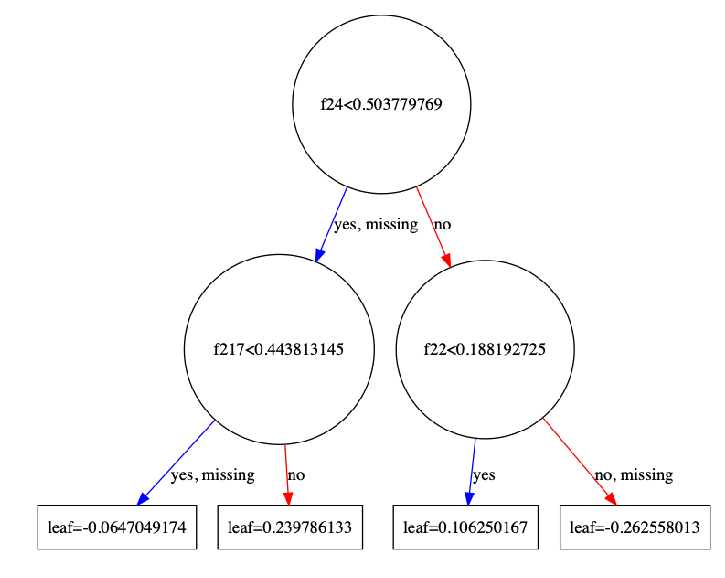

In [12]:
xgb.plot_tree(xg_reg,num_trees=5)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

<Figure size 1080x432 with 0 Axes>

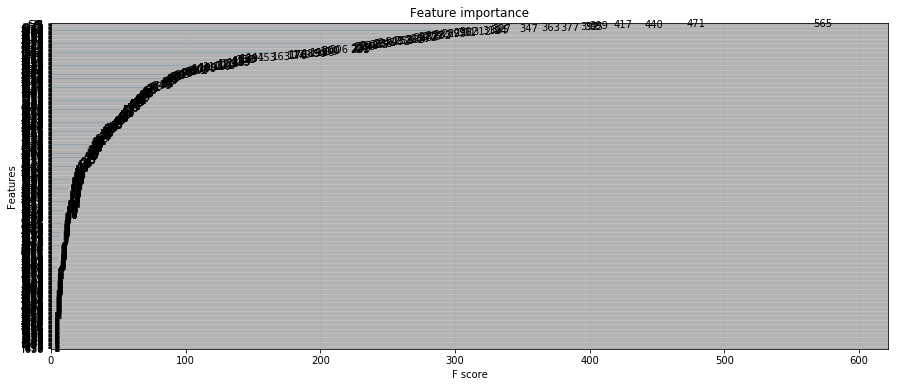

In [14]:
plt.figure(figsize=(15,6))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 6]
plt.show()

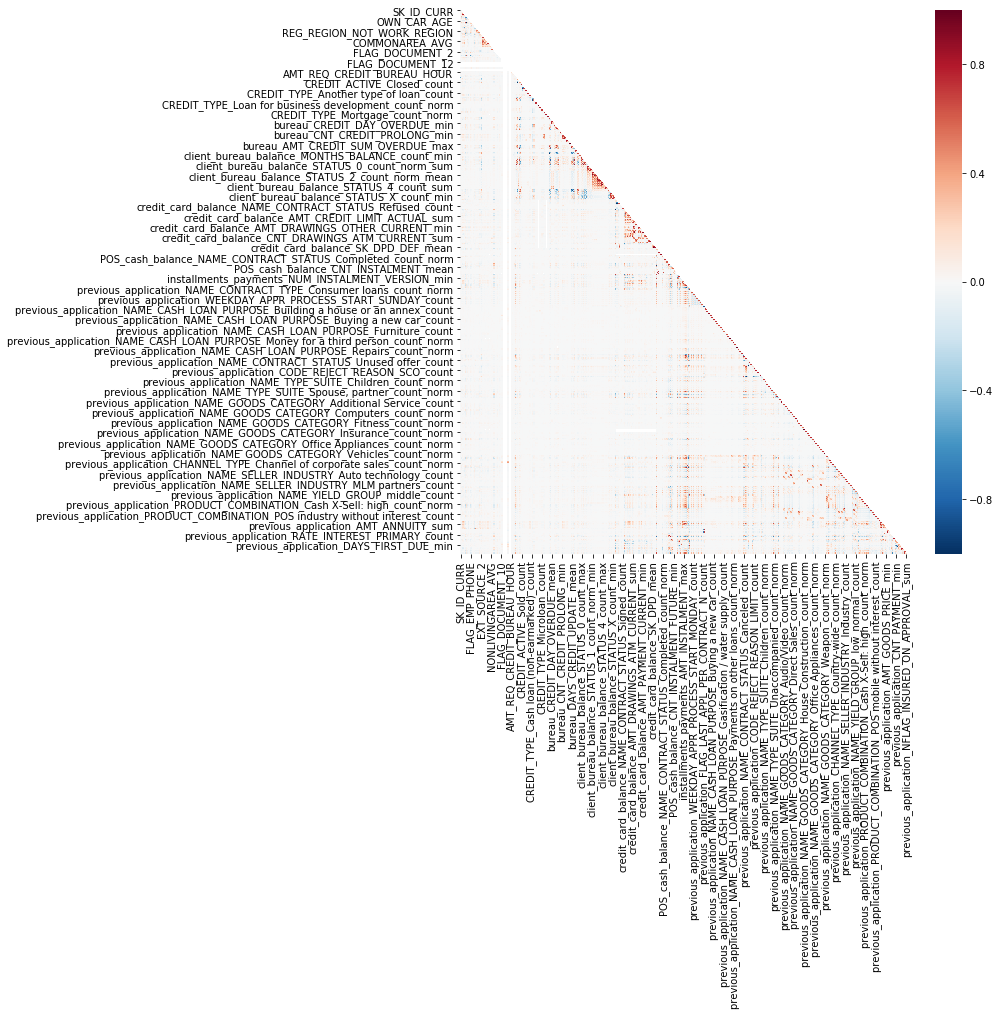

In [16]:
test_df_LT = test_corrs_removed.corr().where(np.tril(np.ones(test_corrs_removed.corr().shape), k=-1).astype(np.bool))
plt.figure(figsize=(10,10))
sns.heatmap(test_df_LT, vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

In [43]:
# df_test = test_corrs_removed['SK_ID_CURR']
# pred_dmatrix = xgb.DMatrix(data=test_features)

print(pred_dmatrix.num_col())
print(data_dmatrix.num_col())

preds = xg_reg.predict(pred_dmatrix)

668
668


In [58]:
test_features = train_corrs_removed
test_ids = test_features['SK_ID_CURR']
test_features = test_features.drop(columns = ['SK_ID_CURR'])
test_features = pd.get_dummies(test_features)
test_features = np.array(test_features)
pred_dmatrix = xgb.DMatrix(data=test_features)
test_predictions = preds = xg_reg.predict(pred_dmatrix)

submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission.head()

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668']
training data did not have the following fields: f668

In [46]:
print(type(preds))
print(len(preds))
print(pred_dmatrix.num_row())
print(data_dmatrix.num_row())
print(test_corrs_removed.shape)

<class 'numpy.ndarray'>
307511
307511
307511
(48744, 545)


In [ ]:
tmp_df = pd.concat([train_corrs_removed])
tmp_df['Data_Set'] = np.concatenate((np.repeat("Prediction", repeats=df_test.shape[0]), 
                                     np.repeat("Training", repeats=test_corrs_removed.shape[0]))
                                   )
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,8))
ax = sns.countplot(data=tmp_df, x='Loan_Status', ax=ax, hue='Data_Set', hue_order=['Training', 'Prediction'], color=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961))
ax.set(xlabel='Loan Status', ylabel='Occurences')